# Solar Radiation Project
## Context
Space Apps Moscow was held on April 29th & 30th. Thank you to the 175 people who joined the International Space Apps Challenge at this location!
## Content
The dataset contains such columns as: "wind direction", "wind speed", "humidity" and temperature. The response parameter that is to be predicted is: "Solar_radiation". It contains measurements for the past 4 months and you have to predict the level of solar radiation.

## Import Relevant Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Load Dataset

In [2]:
# load dataset using pandas library
df = pd.read_csv('SolarPrediction.csv')

# Top 5 records of dataframe
df.head()

UNIXTime                   Data      Time  Radiation  Temperature  \
0  1475229326  9/29/2016 12:00:00 AM  23:55:26       1.21           48   
1  1475229023  9/29/2016 12:00:00 AM  23:50:23       1.21           48   
2  1475228726  9/29/2016 12:00:00 AM  23:45:26       1.23           48   
3  1475228421  9/29/2016 12:00:00 AM  23:40:21       1.21           48   
4  1475228124  9/29/2016 12:00:00 AM  23:35:24       1.17           48   

   Pressure  Humidity  WindDirection(Degrees)  Speed TimeSunRise TimeSunSet  
0     30.46        59                  177.39   5.62    06:13:00   18:13:00  
1     30.46        58                  176.78   3.37    06:13:00   18:13:00  
2     30.46        57                  158.75   3.37    06:13:00   18:13:00  
3     30.46        60                  137.71   3.37    06:13:00   18:13:00  
4     30.46        62                  104.95   5.62    06:13:00   18:13:00

## Basic Dataset Exploration

In [3]:
# check all information provided in dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32686 entries, 0 to 32685
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   UNIXTime                32686 non-null  int64  
 1   Data                    32686 non-null  object 
 2   Time                    32686 non-null  object 
 3   Radiation               32686 non-null  float64
 4   Temperature             32686 non-null  int64  
 5   Pressure                32686 non-null  float64
 6   Humidity                32686 non-null  int64  
 7   WindDirection(Degrees)  32686 non-null  float64
 8   Speed                   32686 non-null  float64
 9   TimeSunRise             32686 non-null  object 
 10  TimeSunSet              32686 non-null  object 
dtypes: float64(4), int64(3), object(4)
memory usage: 2.7+ MB


In [8]:
# basic statistic of dataset
df.describe()

UNIXTime     Radiation   Temperature      Pressure      Humidity  \
count  3.268600e+04  32686.000000  32686.000000  32686.000000  32686.000000   
mean   1.478047e+09    207.124697     51.103255     30.422879     75.016307   
std    3.005037e+06    315.916387      6.201157      0.054673     25.990219   
min    1.472724e+09      1.110000     34.000000     30.190000      8.000000   
25%    1.475546e+09      1.230000     46.000000     30.400000     56.000000   
50%    1.478026e+09      2.660000     50.000000     30.430000     85.000000   
75%    1.480480e+09    354.235000     55.000000     30.460000     97.000000   
max    1.483265e+09   1601.260000     71.000000     30.560000    103.000000   

       WindDirection(Degrees)         Speed  
count            32686.000000  32686.000000  
mean               143.489821      6.243869  
std                 83.167500      3.490474  
min                  0.090000      0.000000  
25%                 82.227500      3.370000  
50%                147.700000      5.620000  
75%                179.310000      7.870000  
max                359.950000     40.500000

In [4]:
df.shape

(32686, 11)

In [9]:
# checking null or missing values in dataframe
df.isna().sum()

UNIXTime                  0
Data                      0
Time                      0
Radiation                 0
Temperature               0
Pressure                  0
Humidity                  0
WindDirection(Degrees)    0
Speed                     0
TimeSunRise               0
TimeSunSet                0
dtype: int64

In [10]:
# check the columns present in dataframe
df.columns

Index(['UNIXTime', 'Data', 'Time', 'Radiation', 'Temperature', 'Pressure',
       'Humidity', 'WindDirection(Degrees)', 'Speed', 'TimeSunRise',
       'TimeSunSet'],
      dtype='object')

In [11]:
# check the shape of the dataframe
row, col = df.shape
print(f'Dataframe contain {row} rows and {col} columns.')

Dataframe contain 32686 rows and 11 columns.


### Basic Data Exploration Conclusion:
1. Our Dataset is well cleaned it don't have any null or missing values.
2. Dataset is contain 32686 number of rows and 11 columns, which is good to build a machine learning model.
3. Some columns datatype is not good like: 'Data', 'Time', 'TimeSunRise' and 'TimeSunSet'.So, we need to fix it before performing any analysis, visualization and model building.

## Data Preprocessing

In [12]:
# Extract Date from Date/Time column (Data) present in dataframe
# using lambda function to split the 'Date' from this 'Data' column
df['Data'] = df['Data'].apply(lambda x: x.split()[0])

In [13]:
# check the dataframe
df.head()

UNIXTime       Data      Time  Radiation  Temperature  Pressure  \
0  1475229326  9/29/2016  23:55:26       1.21           48     30.46   
1  1475229023  9/29/2016  23:50:23       1.21           48     30.46   
2  1475228726  9/29/2016  23:45:26       1.23           48     30.46   
3  1475228421  9/29/2016  23:40:21       1.21           48     30.46   
4  1475228124  9/29/2016  23:35:24       1.17           48     30.46   

   Humidity  WindDirection(Degrees)  Speed TimeSunRise TimeSunSet  
0        59                  177.39   5.62    06:13:00   18:13:00  
1        58                  176.78   3.37    06:13:00   18:13:00  
2        57                  158.75   3.37    06:13:00   18:13:00  
3        60                  137.71   3.37    06:13:00   18:13:00  
4        62                  104.95   5.62    06:13:00   18:13:00

In [14]:
# Extract Date and Month from 'Data' column. Note: Year is not required because year is same '2016' for all records.
df['Day'] = pd.to_datetime(df['Data']).dt.day
df["Month"] = pd.to_datetime(df['Data']).dt.month

In [15]:
# Extract Hour, Minute and Second from 'Time' column.
df['Hour'] = pd.to_datetime(df['Time']).dt.hour
df['Minute'] = pd.to_datetime(df['Time']).dt.minute
df['Second'] = pd.to_datetime(df['Time']).dt.second

In [16]:
# check the dataframe
df.head()

UNIXTime       Data      Time  Radiation  Temperature  Pressure  \
0  1475229326  9/29/2016  23:55:26       1.21           48     30.46   
1  1475229023  9/29/2016  23:50:23       1.21           48     30.46   
2  1475228726  9/29/2016  23:45:26       1.23           48     30.46   
3  1475228421  9/29/2016  23:40:21       1.21           48     30.46   
4  1475228124  9/29/2016  23:35:24       1.17           48     30.46   

   Humidity  WindDirection(Degrees)  Speed TimeSunRise TimeSunSet  Day  Month  \
0        59                  177.39   5.62    06:13:00   18:13:00   29      9   
1        58                  176.78   3.37    06:13:00   18:13:00   29      9   
2        57                  158.75   3.37    06:13:00   18:13:00   29      9   
3        60                  137.71   3.37    06:13:00   18:13:00   29      9   
4        62                  104.95   5.62    06:13:00   18:13:00   29      9   

   Hour  Minute  Second  
0    23      55      26  
1    23      50      23  
2    23      45      26  
3    23      40      21  
4    23      35      24

In [17]:
# check some time-series visualization before droping the irrelevant columns
df['Data'] = pd.to_datetime(df['Data'])

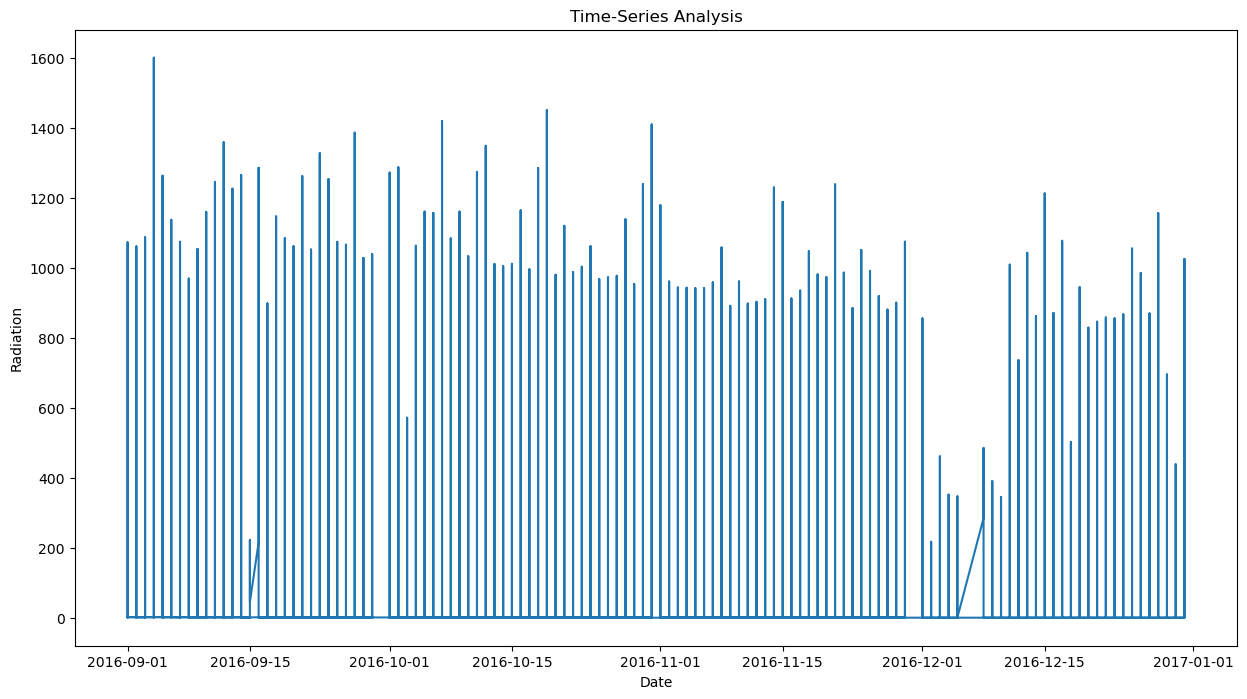

In [18]:
# time-series analysis using 'Data' vs 'Radiation' column
plt.figure(figsize=(15,8))
plt.plot(df['Data'],df['Radiation'])
plt.xlabel('Date')
plt.ylabel('Radiation')
plt.title('Time-Series Analysis')
plt.show()

In [19]:
# Extract Hour and Minute from 'TimeSunRise' column
df['RiseHour'] = pd.to_datetime(df['TimeSunRise']).dt.hour
df['RiseMinute'] = pd.to_datetime(df['TimeSunRise']).dt.minute

In [20]:
# Extract Hour and Minute from 'TimeSunSet' column
df['SetHour'] = pd.to_datetime(df['TimeSunSet']).dt.hour
df['SetMinute'] = pd.to_datetime(df['TimeSunSet']).dt.minute

In [21]:
# check the dataframe
df.head()

UNIXTime       Data      Time  Radiation  Temperature  Pressure  \
0  1475229326 2016-09-29  23:55:26       1.21           48     30.46   
1  1475229023 2016-09-29  23:50:23       1.21           48     30.46   
2  1475228726 2016-09-29  23:45:26       1.23           48     30.46   
3  1475228421 2016-09-29  23:40:21       1.21           48     30.46   
4  1475228124 2016-09-29  23:35:24       1.17           48     30.46   

   Humidity  WindDirection(Degrees)  Speed TimeSunRise TimeSunSet  Day  Month  \
0        59                  177.39   5.62    06:13:00   18:13:00   29      9   
1        58                  176.78   3.37    06:13:00   18:13:00   29      9   
2        57                  158.75   3.37    06:13:00   18:13:00   29      9   
3        60                  137.71   3.37    06:13:00   18:13:00   29      9   
4        62                  104.95   5.62    06:13:00   18:13:00   29      9   

   Hour  Minute  Second  RiseHour  RiseMinute  SetHour  SetMinute  
0    23      55      26         6          13       18         13  
1    23      50      23         6          13       18         13  
2    23      45      26         6          13       18         13  
3    23      40      21         6          13       18         13  
4    23      35      24         6          13       18         13

In [22]:
# Now, we extract all the dates, months, time etc. It's time to drop the unnecessary columns from the dataset
df = df.drop(['UNIXTime','Data','Time','TimeSunSet','TimeSunRise'],axis=1)      # did't use inplace function to not delete columns permanently from dataframe

In [23]:
df.head()

Radiation  Temperature  Pressure  Humidity  WindDirection(Degrees)  Speed  \
0       1.21           48     30.46        59                  177.39   5.62   
1       1.21           48     30.46        58                  176.78   3.37   
2       1.23           48     30.46        57                  158.75   3.37   
3       1.21           48     30.46        60                  137.71   3.37   
4       1.17           48     30.46        62                  104.95   5.62   

   Day  Month  Hour  Minute  Second  RiseHour  RiseMinute  SetHour  SetMinute  
0   29      9    23      55      26         6          13       18         13  
1   29      9    23      50      23         6          13       18         13  
2   29      9    23      45      26         6          13       18         13  
3   29      9    23      40      21         6          13       18         13  
4   29      9    23      35      24         6          13       18         13

## Data Visualization (EDA)

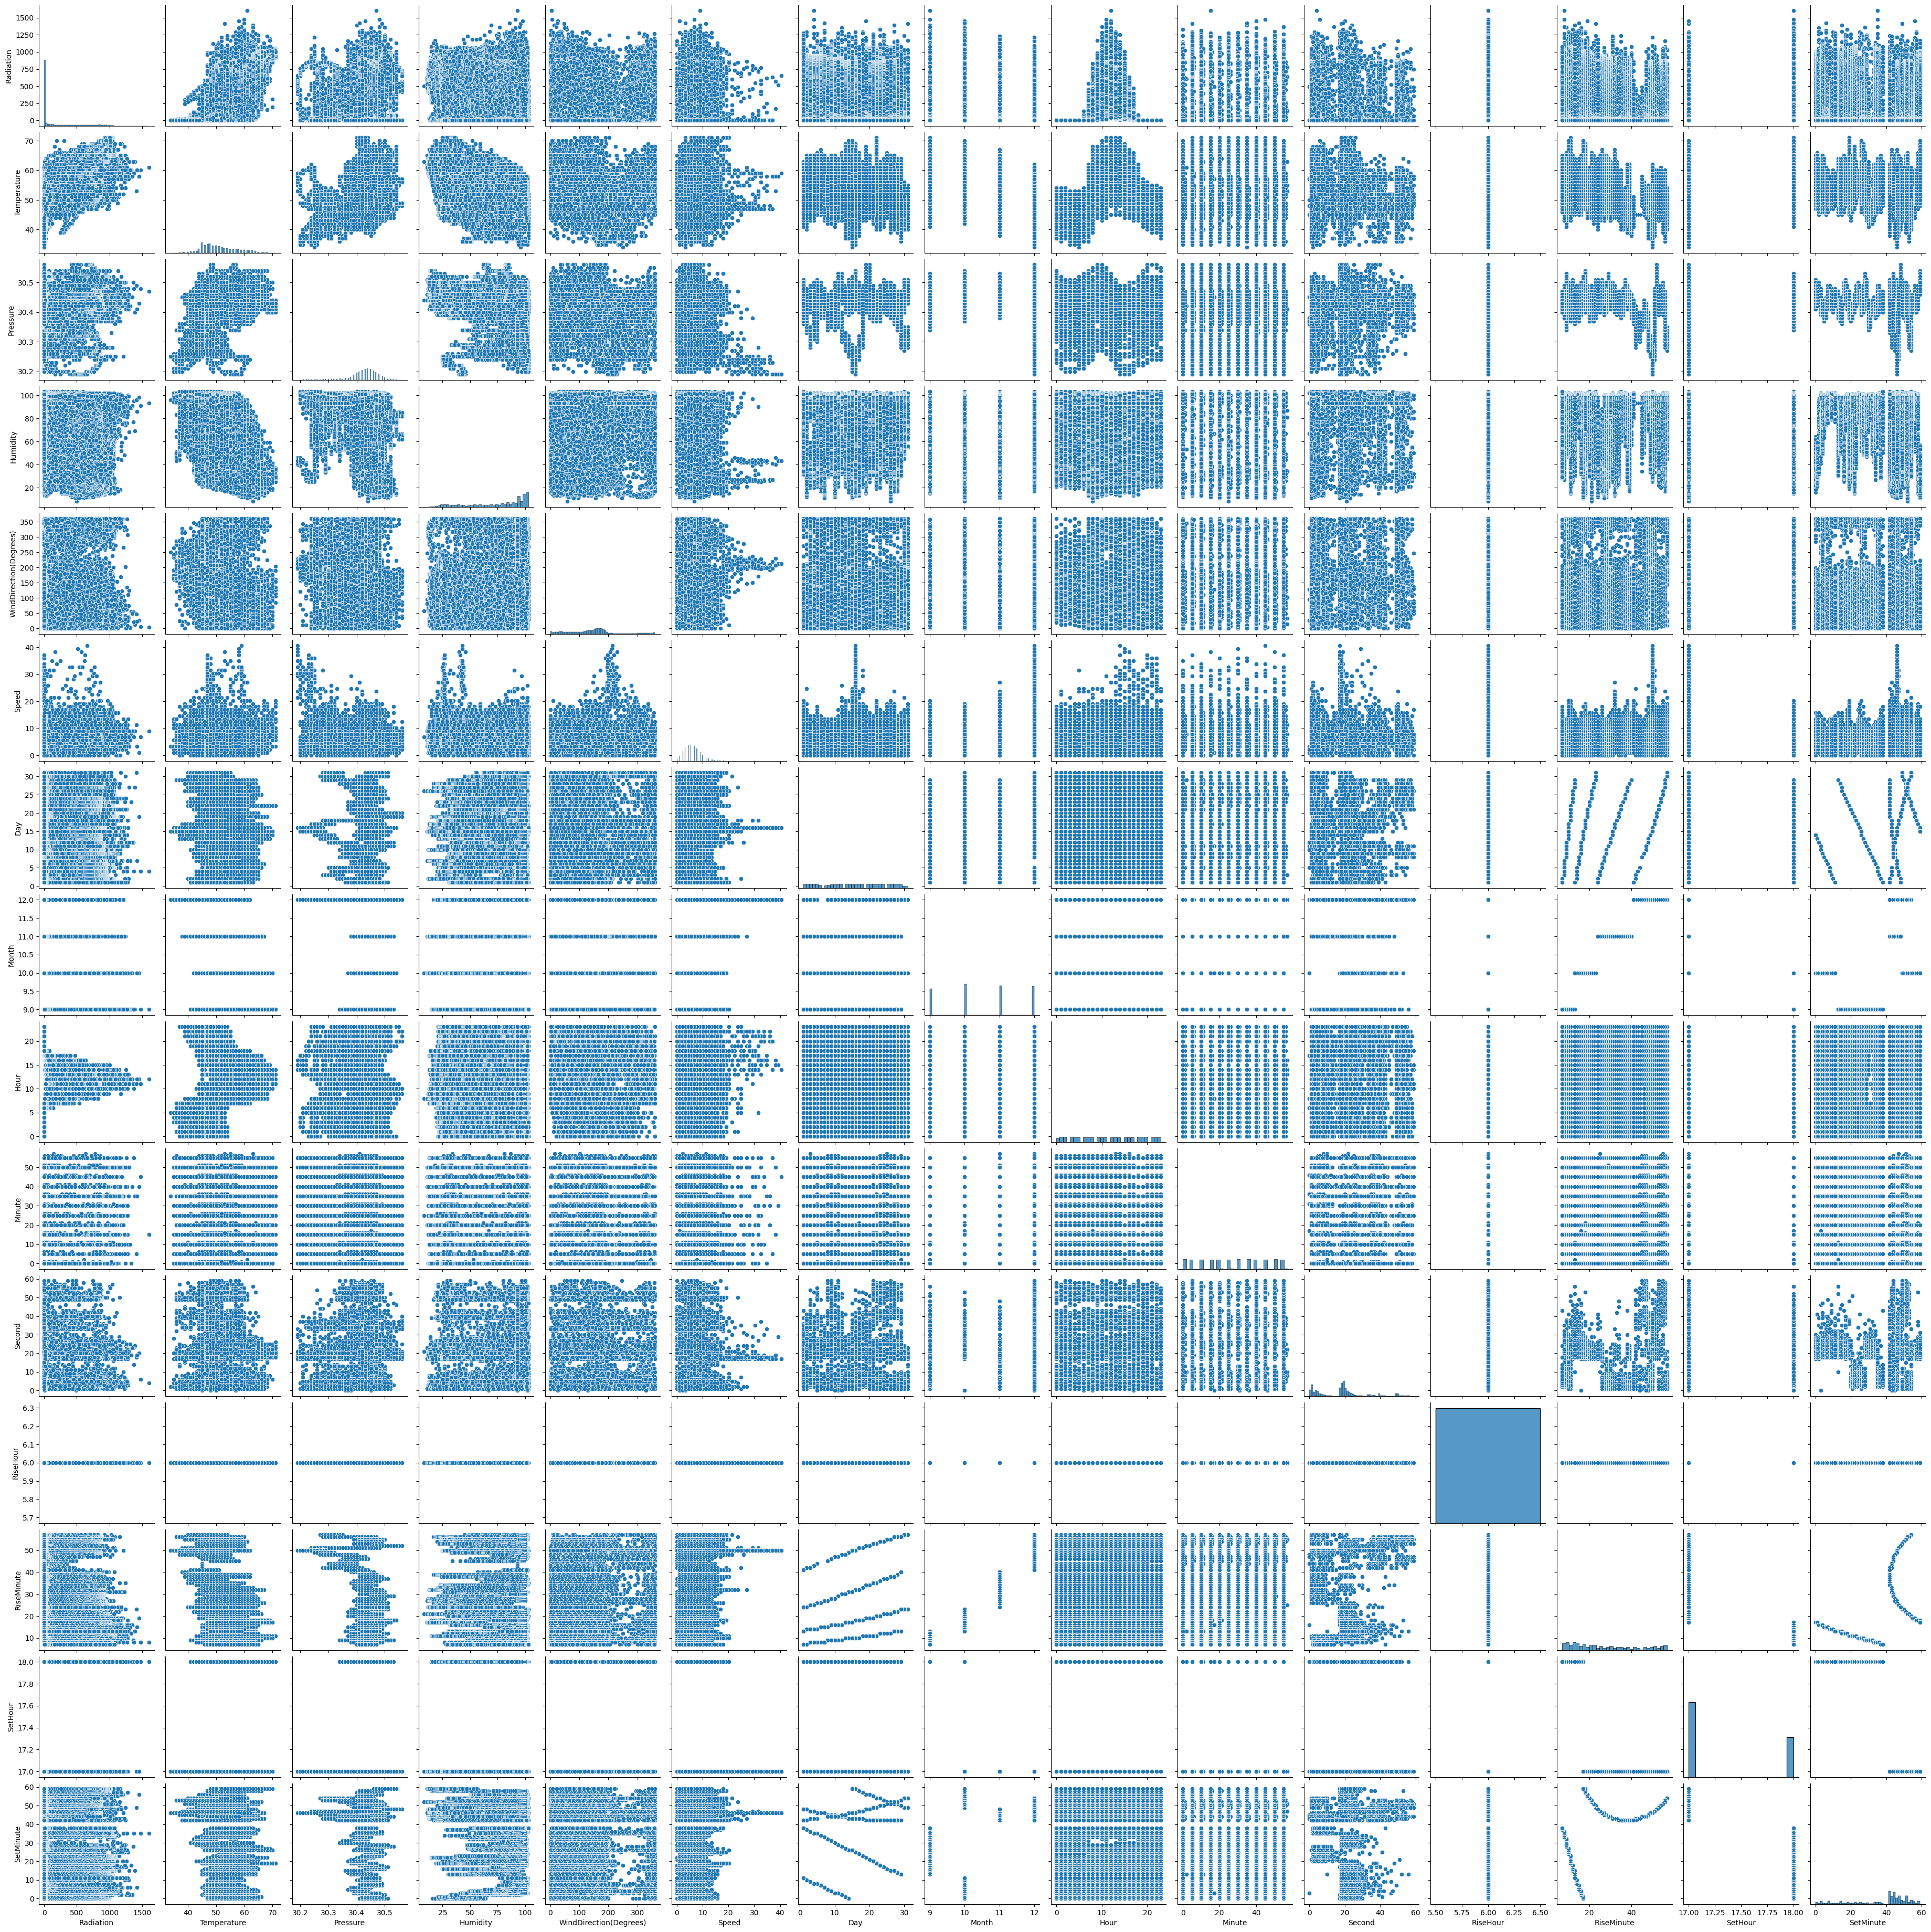

In [20]:
# performing lazy plot or pair plot to understand the data quickly
sns.pairplot(df)

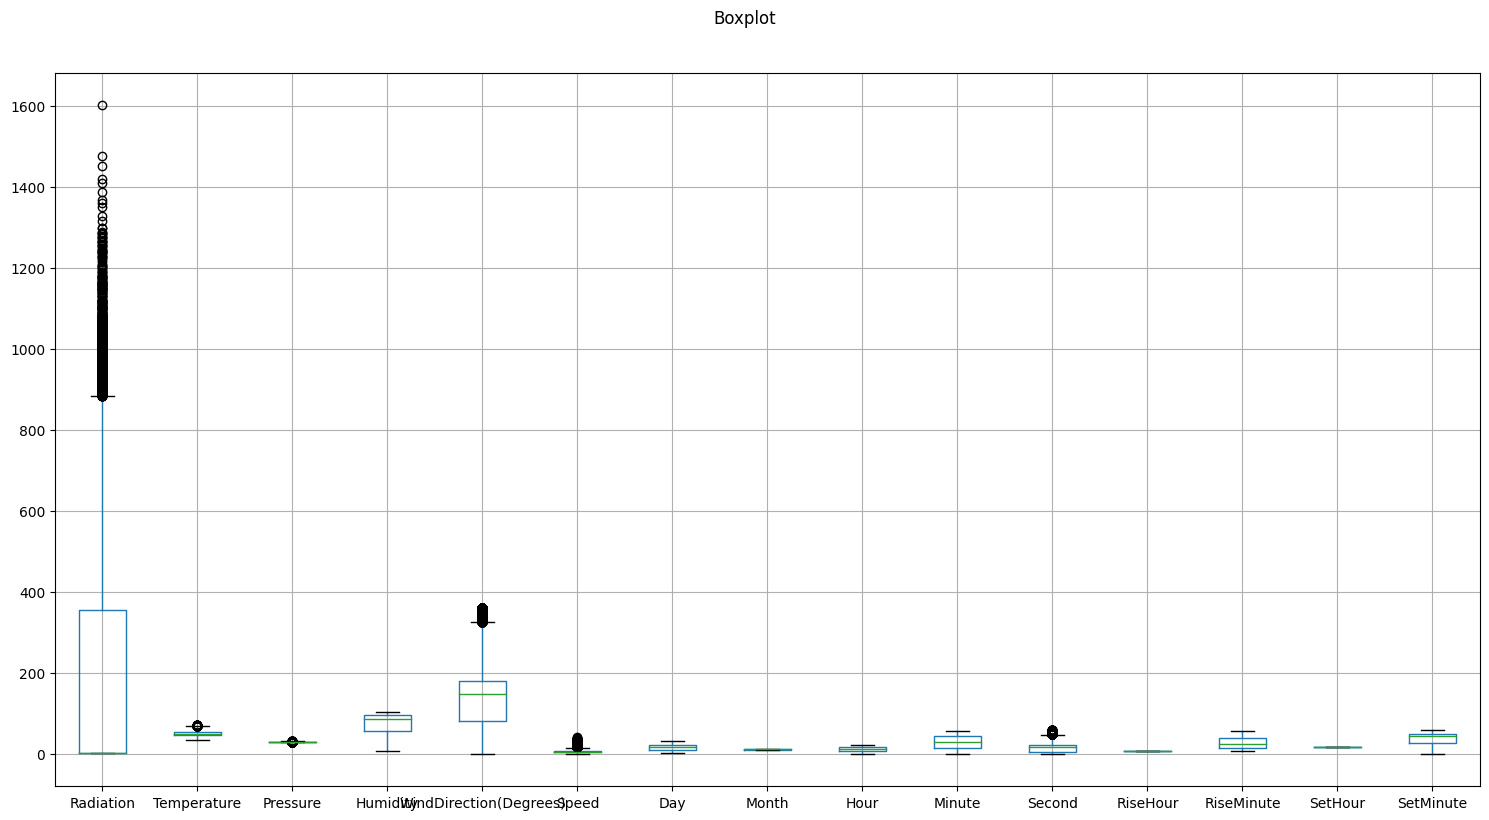

In [22]:
# boxplot of all the features

# create boxplot of all the features
df.boxplot(figsize=(15,8))

# add title with size and position
plt.suptitle('Boxplot',x=0.5,y=1.02,ha='center',fontsize='large')

# maintain perfect gaps between all plots
plt.tight_layout()

According to above boxplots, we will able to conclude that columns 'Radiation', 'Temperature', 'Pressure', 'Wind Direction' and 'Speed' has Outliers. We will deal with outliers later.

In our dataset, It is mentioned that columns 'Radiation' have some  intersecting dependences with column 'Humidity' and 'Temperature'. Let's check this using scatterplot.

Text(0.5, 1.0, 'Realtion between Humidity and Radiation')

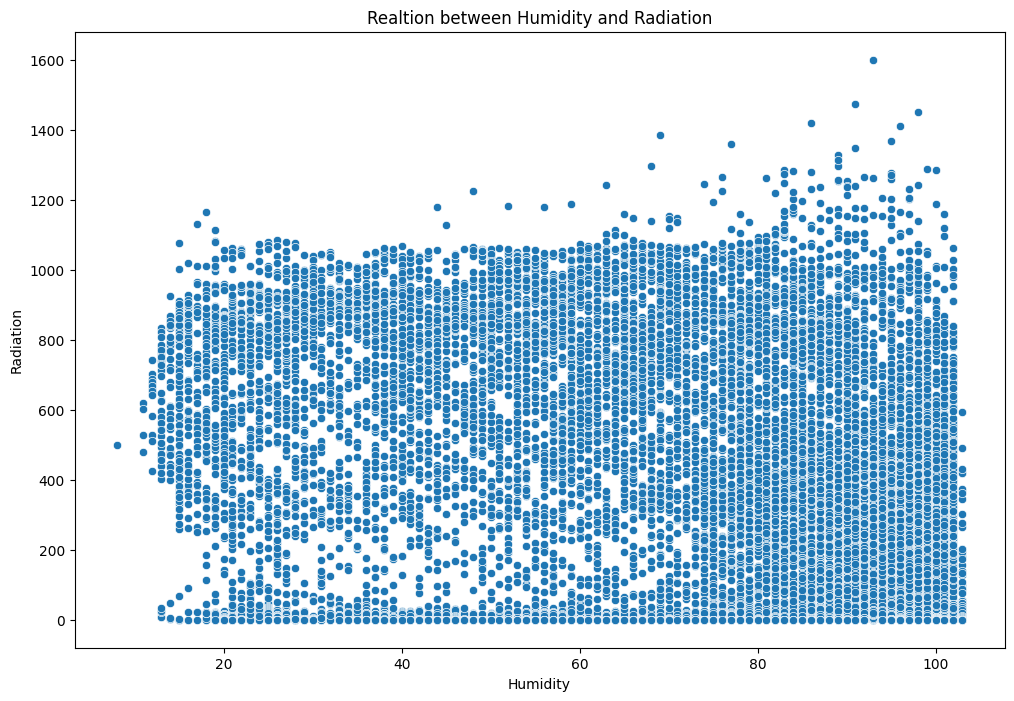

In [23]:
# fix the size of the plot
plt.figure(figsize=(12,8))

# plot the scatterplot
sns.scatterplot(data=df,x='Humidity',y='Radiation')

# add title
plt.title('Realtion between Humidity and Radiation')

So, we are able to see that Humidity have the strong relationship with Radiation.
Let's check for Temperature

Text(0.5, 1.0, 'Realtion between Temperature and Radiation')

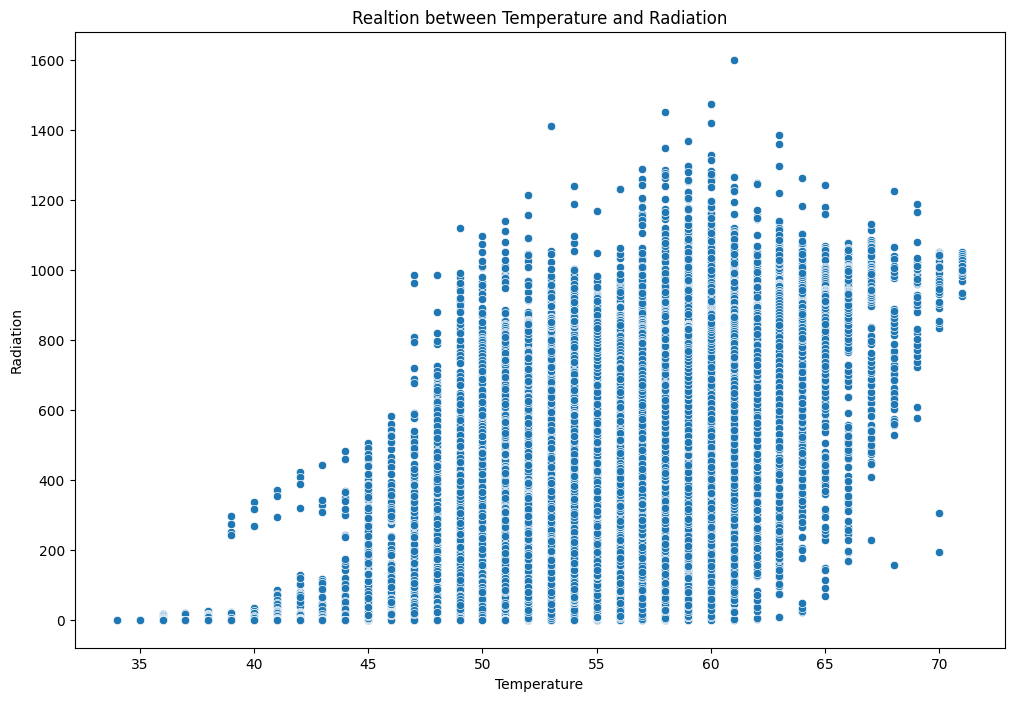

In [24]:
# fix the size of the plot
plt.figure(figsize=(12,8))

# plot the scatterplot
sns.scatterplot(data=df,x='Temperature',y='Radiation')

# add title
plt.title('Realtion between Temperature and Radiation')

Temperature also having a nice reation with Radiation.

### Coorelation Matrix and Heatmap

In [25]:
# check the coorelation matrix of dataframe
df.corr()

Radiation  Temperature  Pressure  Humidity  \
Radiation                1.000000     0.734955  0.119016 -0.226171   
Temperature              0.734955     1.000000  0.311173 -0.285055   
Pressure                 0.119016     0.311173  1.000000 -0.223973   
Humidity                -0.226171    -0.285055 -0.223973  1.000000   
WindDirection(Degrees)  -0.230324    -0.259421 -0.229010 -0.001833   
Speed                    0.073627    -0.031458 -0.083639 -0.211624   
Day                      0.039978    -0.123705 -0.024633  0.014637   
Month                   -0.095450    -0.354560 -0.341759 -0.068854   
Hour                     0.004398     0.197464  0.091069  0.077899   
Minute                  -0.000730    -0.001934  0.001860  0.000499   
Second                  -0.031270    -0.036147 -0.031102 -0.027682   
RiseHour                      NaN          NaN       NaN       NaN   
RiseMinute              -0.092850    -0.380968 -0.380399 -0.023955   
SetHour                  0.048719     0.300920  0.151939  0.145143   
SetMinute               -0.039816    -0.242881 -0.119599 -0.119526   

                        WindDirection(Degrees)     Speed       Day     Month  \
Radiation                            -0.230324  0.073627  0.039978 -0.095450   
Temperature                          -0.259421 -0.031458 -0.123705 -0.354560   
Pressure                             -0.229010 -0.083639 -0.024633 -0.341759   
Humidity                             -0.001833 -0.211624  0.014637 -0.068854   
WindDirection(Degrees)                1.000000  0.073092 -0.082354  0.181485   
Speed                                 0.073092  1.000000  0.117337  0.150822   
Day                                  -0.082354  0.117337  1.000000  0.038027   
Month                                 0.181485  0.150822  0.038027  1.000000   
Hour                                 -0.077969 -0.057939 -0.008010 -0.005396   
Minute                               -0.000602  0.000192 -0.000196  0.000168   
Second                               -0.032568 -0.032934  0.089078  0.220563   
RiseHour                                   NaN       NaN       NaN       NaN   
RiseMinute                            0.176929  0.167075  0.274522  0.952472   
SetHour                              -0.078540 -0.159384 -0.263575 -0.784783   
SetMinute                             0.070030  0.119926  0.265662  0.541883   

                            Hour    Minute    Second  RiseHour  RiseMinute  \
Radiation               0.004398 -0.000730 -0.031270       NaN   -0.092850   
Temperature             0.197464 -0.001934 -0.036147       NaN   -0.380968   
Pressure                0.091069  0.001860 -0.031102       NaN   -0.380399   
Humidity                0.077899  0.000499 -0.027682       NaN   -0.023955   
WindDirection(Degrees) -0.077969 -0.000602 -0.032568       NaN    0.176929   
Speed                  -0.057939  0.000192 -0.032934       NaN    0.167075   
Day                    -0.008010 -0.000196  0.089078       NaN    0.274522   
Month                  -0.005396  0.000168  0.220563       NaN    0.952472   
Hour                    1.000000 -0.004052  0.004199       NaN   -0.006772   
Minute                 -0.004052  1.000000  0.002517       NaN   -0.000158   
Second                  0.004199  0.002517  1.000000       NaN    0.258917   
RiseHour                     NaN       NaN       NaN       NaN         NaN   
RiseMinute             -0.006772 -0.000158  0.258917       NaN    1.000000   
SetHour                 0.008629  0.001052 -0.037743       NaN   -0.742329   
SetMinute              -0.007056 -0.002215  0.003571       NaN    0.562851   

                         SetHour  SetMinute  
Radiation               0.048719  -0.039816  
Temperature             0.300920  -0.242881  
Pressure                0.151939  -0.119599  
Humidity                0.145143  -0.119526  
WindDirection(Degrees) -0.078540   0.070030  
Speed                  -0.159384   0.119926  
Day                    -0.263575   0.265662  
Month

Text(0.5, 1.0, 'Cooreation Matrix of Dataframe')

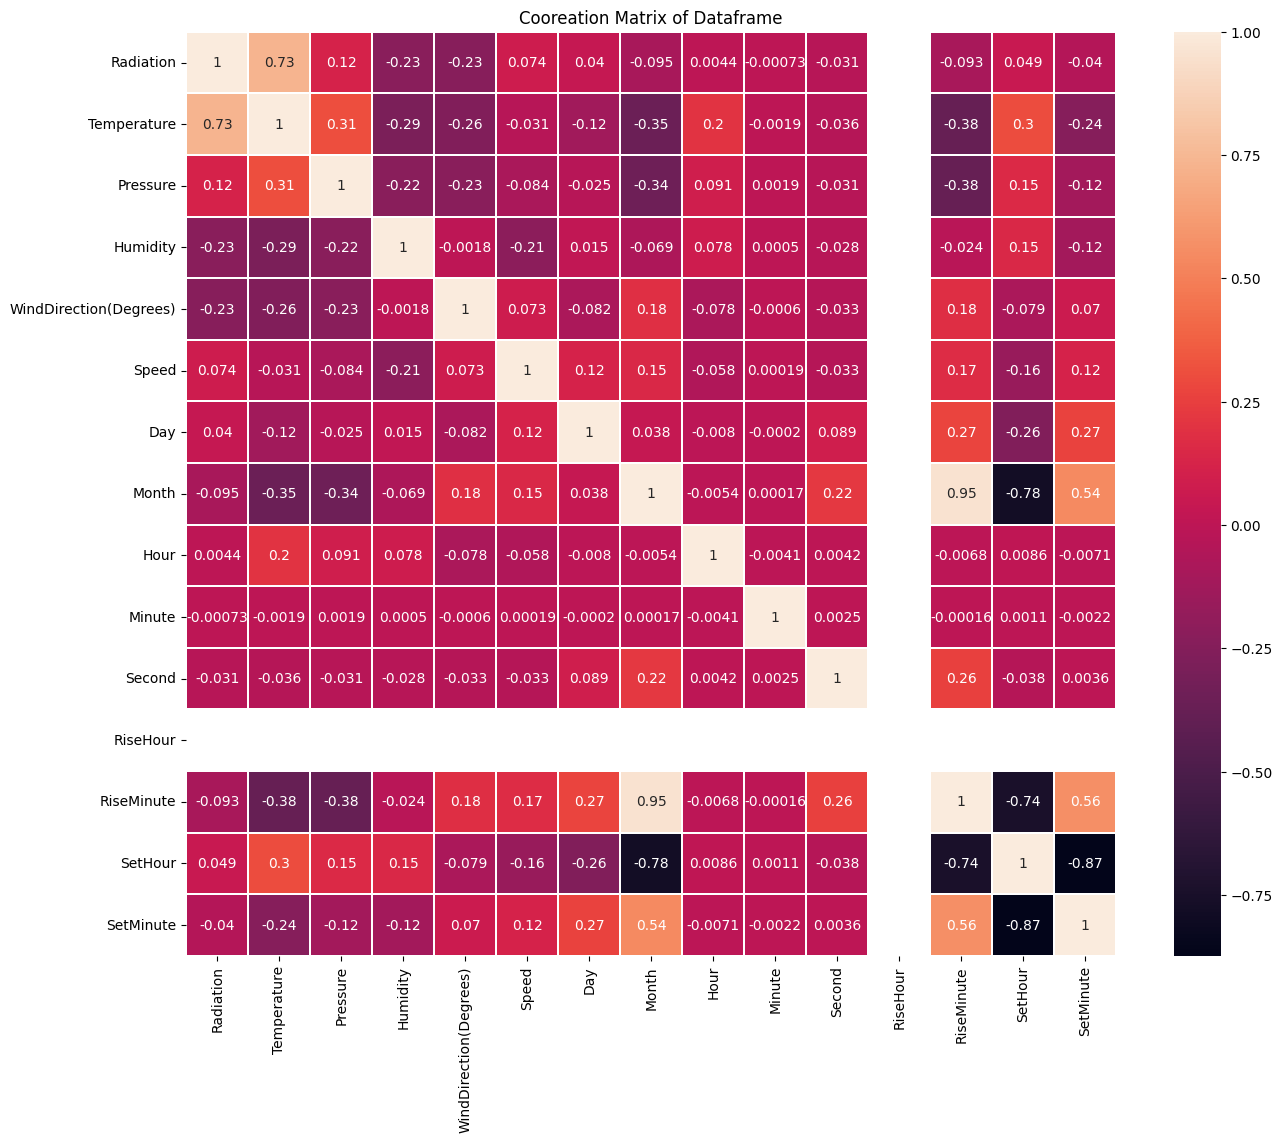

In [26]:
# plotting heatmap to check the coorelation visually
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(),annot=True,linecolor='white',linewidths=0.2)
plt.title('Cooreation Matrix of Dataframe')

Since there is only one unique value (i.e., 6) in the 'RiseHour' column,the standard deviation is zero, leading to NaN correlations.

As we are able to see that 'Temperature' is showing highly positive correlation and 'Humidity' & 'Wind Direction' is showing negative correlation.

Text(0.5, 1.0, 'Lineplot of Temperature vs Radiation')

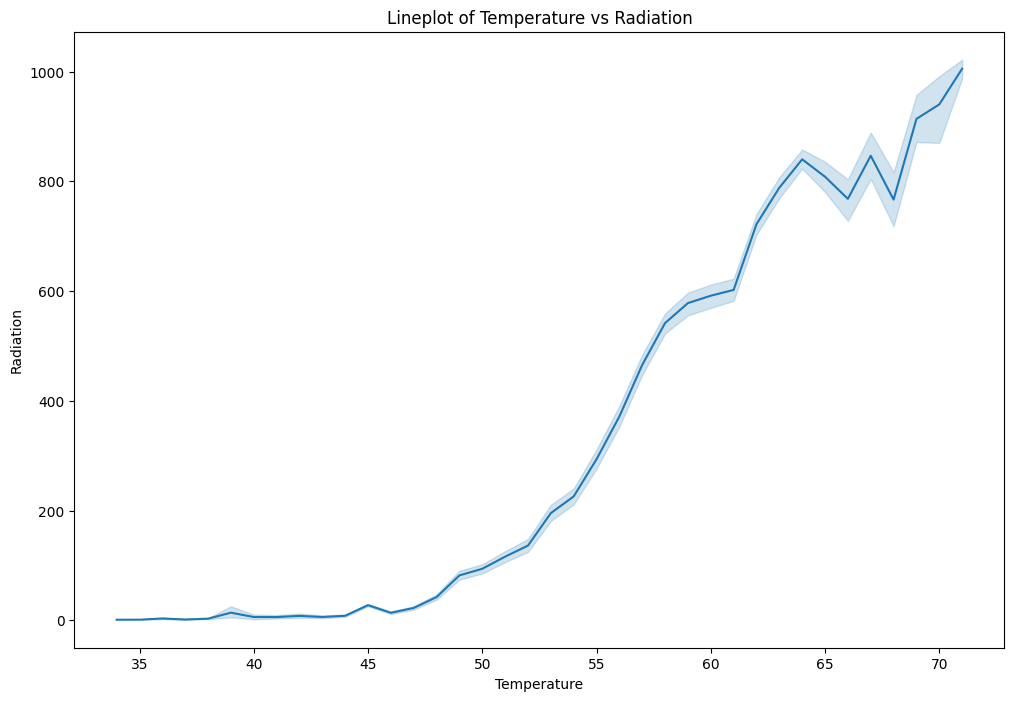

In [31]:
# check the relation between Temperature and Radiation using lineplot
plt.figure(figsize=(12,8))
sns.lineplot(data=df,x='Temperature',y='Radiation')
plt.title('Lineplot of Temperature vs Radiation')

Distribution of Month is kind of equally distributed.

## Outlier Removal (Data Preprocessing - Part 2)

In [24]:
# make a copy of an original dataframe to work with it later.
df_copy = df.copy()

In [25]:
# check the information of copied dataframe
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32686 entries, 0 to 32685
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Radiation               32686 non-null  float64
 1   Temperature             32686 non-null  int64  
 2   Pressure                32686 non-null  float64
 3   Humidity                32686 non-null  int64  
 4   WindDirection(Degrees)  32686 non-null  float64
 5   Speed                   32686 non-null  float64
 6   Day                     32686 non-null  int32  
 7   Month                   32686 non-null  int32  
 8   Hour                    32686 non-null  int32  
 9   Minute                  32686 non-null  int32  
 10  Second                  32686 non-null  int32  
 11  RiseHour                32686 non-null  int32  
 12  RiseMinute              32686 non-null  int32  
 13  SetHour                 32686 non-null  int32  
 14  SetMinute               32686 non-null

### Check Outliers in Copied Dataframe

In [13]:
# checking the outliers in copied dataframe
def detect_Outliers(df):

    for feature in df.drop("Radiation", axis=1).columns:
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_limit = Q1 - 1.5 * IQR
        upper_limit = Q3 + 1.5 * IQR

        outliers = df.loc[(df[feature] < lower_limit) | (df[feature] > upper_limit), feature]

        print(feature, outliers.shape[0])

detect_Outliers(df_copy)

Temperature 89
Pressure 1662
Humidity 0
WindDirection(Degrees) 1618
Speed 479
Day 0
Month 0
Hour 0
Minute 0
Second 1953
RiseHour 0
RiseMinute 0
SetHour 0
SetMinute 0


As we already observed above that there are 6 features who has outliers in it. Let's plot the columns boxplot who has outliers.

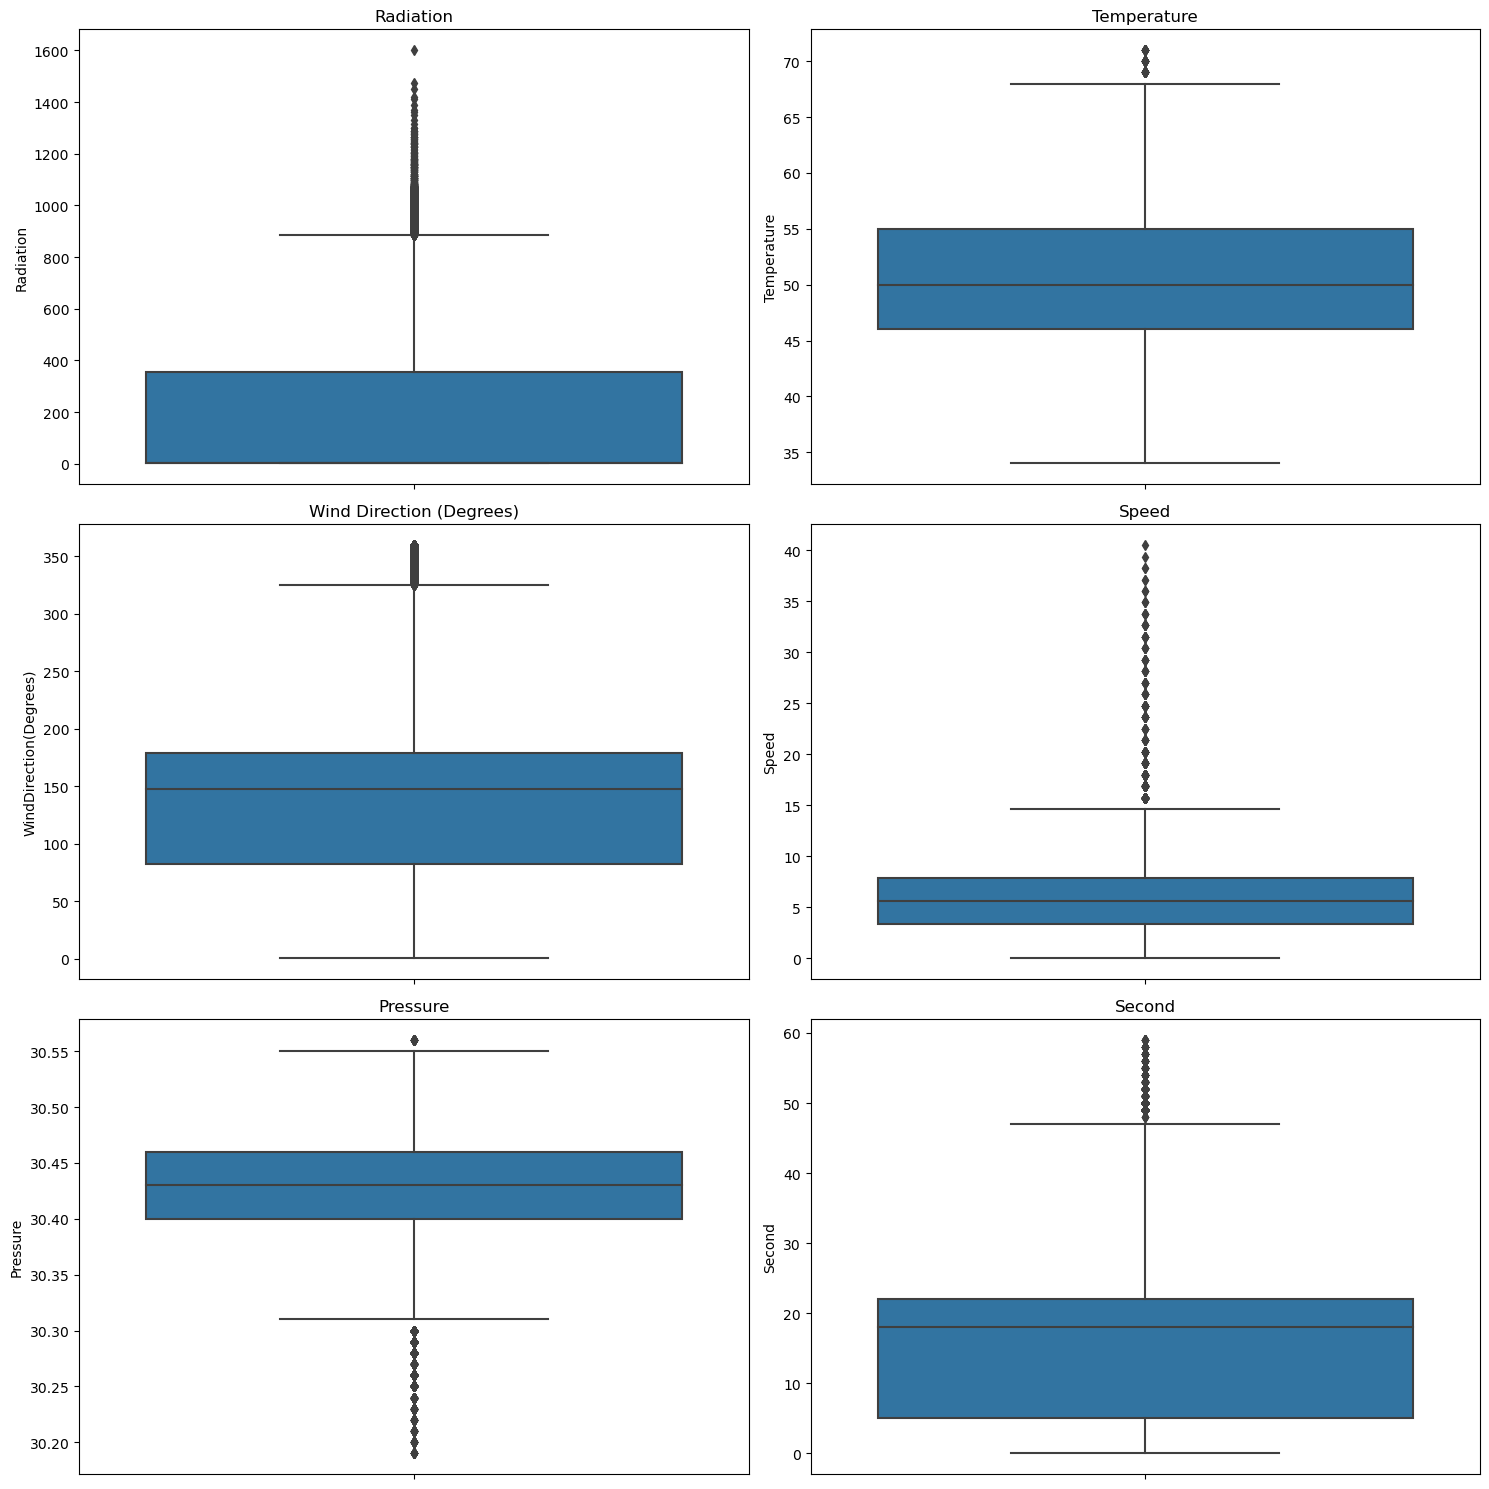

In [26]:
# let's plot the boxplot for all 6 outliers columns w.r.t target feature
plt.figure(figsize=(15,15))

plt.subplot(3,2,1)
sns.boxplot(y=df_copy['Radiation'],data=df_copy)
plt.title('Radiation')

plt.subplot(3,2,2)
sns.boxplot(y=df_copy['Temperature'],data=df_copy)
plt.title('Temperature')

plt.subplot(3,2,3)
sns.boxplot(y=df_copy['WindDirection(Degrees)'],data=df_copy)
plt.title('Wind Direction (Degrees)')

plt.subplot(3,2,4)
sns.boxplot(y=df_copy['Speed'],data=df_copy)
plt.title('Speed')

plt.subplot(3,2,5)
sns.boxplot(y=df_copy['Pressure'],data=df_copy)
plt.title('Pressure')

plt.subplot(3,2,6)
sns.boxplot(y=df_copy['Second'],data=df_copy)
plt.title('Second')

plt.tight_layout()

In [27]:
# Compute all the outliers present in copied dataframe

Q1 = df_copy.quantile(0.25)   # Calculates the first quartile (25th percentile) of the data
Q3 = df_copy.quantile(0.75)   # Calculates the third quartile (75th percentile) of the data
IQR = Q3 - Q1                 # Computes the Interquartile Range (IQR) by subtracting Q1 from Q3

In [28]:
# Outlier removal using IQR method
df_ol = df_copy[~((df_copy < (Q1 - 1.5*IQR)) | (df_copy > (Q3 + 1.5*IQR))).any(axis=1)]

# Assign the DataFrame without outliers to df_copy
df_copy = df_ol

# Shape of the copied dataframe without outliers
df_copy.shape

(25810, 15)

In [29]:
# Check the difference between Original Dataframe (With Outliers) and Copied Dataframe (Without Outliers)
print('Shape of the Original Dataframe (With Outliers):',df.shape)
print('Shape of the Copied Dataframe (Without Outliers):',df_copy.shape)

Shape of the Original Dataframe (With Outliers): (32686, 15)
Shape of the Copied Dataframe (Without Outliers): (25810, 15)


In [30]:
# check the information of the copied dataframe
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25810 entries, 0 to 32685
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Radiation               25810 non-null  float64
 1   Temperature             25810 non-null  int64  
 2   Pressure                25810 non-null  float64
 3   Humidity                25810 non-null  int64  
 4   WindDirection(Degrees)  25810 non-null  float64
 5   Speed                   25810 non-null  float64
 6   Day                     25810 non-null  int32  
 7   Month                   25810 non-null  int32  
 8   Hour                    25810 non-null  int32  
 9   Minute                  25810 non-null  int32  
 10  Second                  25810 non-null  int32  
 11  RiseHour                25810 non-null  int32  
 12  RiseMinute              25810 non-null  int32  
 13  SetHour                 25810 non-null  int32  
 14  SetMinute               25810 non-null  int

## Machine Learning Model Implementation

### Import Relevant Libraries, Models and Functions

In [33]:
# !pip install xgboost
# feature scaling and dataset spliting
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# models and algorithms
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
# from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.ensemble import AdaBoostRegressor
import xgboost as xg

# Evaluation Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Hyperparameter Tuning
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV


### Spliting of Dataset (Copied Dataframe)

In [34]:
# Here I used 'df_copy' which is an copied dataframe without outliers

# input features
X = df_copy.drop('Radiation',axis=1)

# output feature
y = df_copy['Radiation']

In [35]:
# splitting of data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [36]:
# shape of the training and testing datasets
print('Shape of input features dataset for training:',X_train.shape)
print('Shape of output feature dataset for training:',y_train.shape)
print('Shape of input features dataset for testing:',X_test.shape)
print('Shape of output feature dataset for testing:',y_test.shape)

Shape of input features dataset for training: (19357, 14)
Shape of output feature dataset for training: (19357,)
Shape of input features dataset for testing: (6453, 14)
Shape of output feature dataset for testing: (6453,)


### Feature Scaling of train and test input features (Without Outlier)

In [38]:
# scaling or normalize train and test data
scaler = MinMaxScaler()

# X train data
X_train = scaler.fit_transform(X_train)

# X test data
X_test = scaler.transform(X_test)

# Linear Regression
#xxxxxxxx

In [57]:
lr = LinearRegression()
lr.fit(X_train, y_train)


LinearRegression()

In [58]:
# Linear Regression hyperparameter
params_lr = {
    'fit_intercept': [True, False],
    'copy_X': [True, False],
    'n_jobs': [None, -1]  # You can also specify an integer value for exact number of processors
}

In [59]:
grid_search_lr = GridSearchCV(lr, params_lr, cv=5)
grid_search_lr.fit(X_train,y_train)
print('Best Hyperparameters for Linear Regression Model:',grid_search_lr.best_params_)
#Get the best model
best_lr_model = grid_search_lr.best_estimator_
# Make predictions with the best model
grid_lr_pred = best_lr_model.predict(X_test)

Best Hyperparameters for Linear Regression Model: {'copy_X': True, 'fit_intercept': True, 'n_jobs': None}


In [60]:
pred = lr.predict(X_test)
print('Mean Absolute Error:{:.2f}'.format(mean_absolute_error(y_test,pred)))
print('Mean Squared Error:{:.2f}'.format(mean_squared_error(y_test,pred)))
print('Root Mean Squared Error:{:.2f}'.format(mean_squared_error(y_test,pred)**0.5))
print('R2 Score:{:.2f}'.format(r2_score(y_test,pred)))

Mean Absolute Error:118.80
Mean Squared Error:25142.90
Root Mean Squared Error:158.57
R2 Score:0.60


# Decision tree Regressor

In [61]:
dtree = DecisionTreeRegressor()
dtree.fit(X_train,y_train)
pred = dtree.predict(X_test)

In [62]:
print('Mean Absolute Error:{:.2f}'.format(mean_absolute_error(y_test,pred)))
print('Mean Squared Error:{:.2f}'.format(mean_squared_error(y_test,pred)))
print('Root Mean Squared Error:{:.2f}'.format(mean_squared_error(y_test,pred)**0.5))
print('R2 Score:{:.2f}'.format(r2_score(y_test,pred)))

Mean Absolute Error:32.35
Mean Squared Error:7445.76
Root Mean Squared Error:86.29
R2 Score:0.88


In [63]:
#hyperparameter tuning
params_dtree = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [64]:
grid_search_dtree = GridSearchCV(dtree, params_dtree, cv=5)
grid_search_dtree.fit(X_train, y_train)
print("Best hyperparameters for Decision Tree Model:", grid_search_dtree.best_params_)
#Get the best model
best_dtree_model = grid_search_dtree.best_estimator_
# Make predictions with the best model
grid_dtree_pred = best_dtree_model.predict(X_test)

Best hyperparameters for Decision Tree Model: {'max_depth': 15, 'min_samples_leaf': 4, 'min_samples_split': 10}


In [65]:
print('Decision Tree Regs:')
print('Mean Absolute Error:{:.2f}'.format(mean_absolute_error(y_test,grid_dtree_pred)))
print('Mean Squared Error:{:.2f}'.format(mean_squared_error(y_test,grid_dtree_pred)))
print('Root Mean Squared Error:{:.2f}'.format(mean_squared_error(y_test,grid_dtree_pred)**0.5))
print('R2 Score:{:.2f}'.format(r2_score(y_test,grid_dtree_pred)))

Decision Tree Regs:
Mean Absolute Error:31.10
Mean Squared Error:6097.23
Root Mean Squared Error:78.08
R2 Score:0.90


# Adaboost Regressor

In [66]:
abr = AdaBoostRegressor()                 
abr.fit(X_train,y_train)
pred = abr.predict(X_test)

In [67]:
print('Mean Absolute Error:{:.2f}'.format(mean_absolute_error(y_test,pred)))
print('Mean Squared Error:{:.2f}'.format(mean_squared_error(y_test,pred)))
print('Root Mean Squared Error:{:.2f}'.format(mean_squared_error(y_test,pred)**0.5))
print('R2 Score:{:.2f}'.format(r2_score(y_test,pred)))

Mean Absolute Error:65.97
Mean Squared Error:11181.66
Root Mean Squared Error:105.74
R2 Score:0.82


In [68]:
#hyperparameter tuning AdaBoost
params_abr = {
    'n_estimators': [50, 100, 150],  # Number of boosting stages
    'learning_rate': [0.01, 0.1, 1],  # Learning rate
    'loss': ['linear', 'square', 'exponential']  # Loss function to use
}

In [69]:
grid_search_abr = GridSearchCV(abr, params_abr, cv=5)
grid_search_abr.fit(X_train, y_train)
print("Best hyperparameters for AdaBoosting Regression Model:", grid_search_abr.best_params_)
#Get the best model
best_abr_model = grid_search_abr.best_estimator_
# Make predictions with the best model
grid_abr_pred = best_abr_model.predict(X_test)

Best hyperparameters for AdaBoosting Regression Model: {'learning_rate': 1, 'loss': 'linear', 'n_estimators': 50}


In [70]:
print('AdaBoost Regs:')
print('Mean Absolute Error:{:.2f}'.format(mean_absolute_error(y_test,grid_abr_pred)))
print('Mean Squared Error:{:.2f}'.format(mean_squared_error(y_test,grid_abr_pred)))
print('Root Mean Squared Error:{:.2f}'.format(mean_squared_error(y_test,grid_abr_pred)**0.5))
print('R2 Score:{:.2f}'.format(r2_score(y_test,grid_abr_pred)))

AdaBoost Regs:
Mean Absolute Error:67.66
Mean Squared Error:11779.79
Root Mean Squared Error:108.53
R2 Score:0.81


# Random forest Regressor

In [71]:
rfr = RandomForestRegressor() 
rfr.fit(X_train,y_train)
pred = rfr.predict(X_test)

In [72]:
print('Mean Absolute Error:{:.2f}'.format(mean_absolute_error(y_test,pred)))
print('Mean Squared Error:{:.2f}'.format(mean_squared_error(y_test,pred)))
print('Root Mean Squared Error:{:.2f}'.format(mean_squared_error(y_test,pred)**0.5))
print('R2 Score:{:.2f}'.format(r2_score(y_test,pred)))

Mean Absolute Error:25.06
Mean Squared Error:3818.93
Root Mean Squared Error:61.80
R2 Score:0.94


In [83]:
#hyperparameter
params_rfr = {
    'n_estimators': [100,200,300],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum number of levels in tree
    'min_samples_split':[2,6,10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1,3,5],  # Minimum number of samples required at each leaf node
    'bootstrap': [True, False]  # Method of selecting samples for training each tree
}


In [84]:
# Performing Random Forest Regression Hyperparameter tuning using GridSearchCV

grid_search_rfr = GridSearchCV(rfr, params_rfr, cv=5)
grid_search_rfr.fit(X_train, y_train)
print("Best hyperparameters for Random Forest Model:", grid_search_rfr.best_params_)
#Get the best model
best_rfr_model = grid_search_rfr.best_estimator_
# Make predictions with the best model
grid_rfr_pred = best_rfr_model.predict(X_test)

KeyboardInterrupt: 

In [78]:
#after hyper

print('Random Forest Regs:')
print('Mean Absolute Error:{:.2f}'.format(mean_absolute_error(y_test,grid_rfr_pred)))
print('Mean Squared Error:{:.2f}'.format(mean_squared_error(y_test,grid_rfr_pred)))
print('Root Mean Squared Error:{:.2f}'.format(mean_squared_error(y_test,grid_rfr_pred)**0.5))
print('R2 Score:{:.2f}'.format(r2_score(y_test,grid_rfr_pred)))


# print('Random Forest Regs:')
# print('Mean Absolute Error:{:.2f}'.format(mean_absolute_error(y_test,grid_dtree_pred)))
# print('Mean Squared Error:{:.2f}'.format(mean_squared_error(y_test,grid_dtree_pred)))
# print('Root Mean Squared Error:{:.2f}'.format(mean_squared_error(y_test,grid_dtree_pred)**0.5))
# print('R2 Score:{:.2f}'.format(r2_score(y_test,grid_dtree_pred)))

Random Forest Regs:
Mean Absolute Error:31.08
Mean Squared Error:6090.17
Root Mean Squared Error:78.04
R2 Score:0.90


# SVR


In [79]:
svr = SVR()                 # Support Vector Regression Model
svr.fit(X_train,y_train)
pred = svr.predict(X_test)

In [80]:
print('Mean Absolute Error:{:.2f}'.format(mean_absolute_error(y_test,pred)))
print('Mean Squared Error:{:.2f}'.format(mean_squared_error(y_test,pred)))
print('Root Mean Squared Error:{:.2f}'.format(mean_squared_error(y_test,pred)**0.5))
print('R2 Score:{:.2f}'.format(r2_score(y_test,pred)))

Mean Absolute Error:116.99
Mean Squared Error:44918.02
Root Mean Squared Error:211.94
R2 Score:0.29


In [81]:
#hyperparameter
# Support Vector
params_svr = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1]
}

In [82]:
# Performing Support Vector Regression Hyperparameter tuning using GridSearchCV

grid_search_svr = GridSearchCV(svr, params_svr, cv=5)
grid_search_svr.fit(X_train, y_train)
print("Best hyperparameters for Support Vector Regression Model:", grid_search_svr.best_params_)
#Get the best model
best_svr_model = grid_search_svr.best_estimator_
# Make predictions with the best model
grid_svr_pred = best_svr_model.predict(X_test)

KeyboardInterrupt: 

In [ ]:
# Support Vector Regression

print('Support Vector Regs:')
print('Mean Absolute Error:{:.2f}'.format(mean_absolute_error(y_test,grid_svr_pred)))
print('Mean Squared Error:{:.2f}'.format(mean_squared_error(y_test,grid_svr_pred)))
print('Root Mean Squared Error:{:.2f}'.format(mean_squared_error(y_test,grid_svr_pred)**0.5))
print('R2 Score:{:.2f}'.format(r2_score(y_test,grid_svr_pred)))

# SGD


In [85]:
sgd = SGDRegressor()                        # SGD Regression Model 
sgd.fit(X_train,y_train)
pred = sgd.predict(X_test)

In [86]:
print('Mean Absolute Error:{:.2f}'.format(mean_absolute_error(y_test,pred)))
print('Mean Squared Error:{:.2f}'.format(mean_squared_error(y_test,pred)))
print('Root Mean Squared Error:{:.2f}'.format(mean_squared_error(y_test,pred)**0.5))
print('R2 Score:{:.2f}'.format(r2_score(y_test,pred)))

Mean Absolute Error:119.03
Mean Squared Error:25190.96
Root Mean Squared Error:158.72
R2 Score:0.60


In [87]:
# hyperparameter SGD
params_sgd = {
    'alpha': [0.0001, 0.001, 0.01],
    'max_iter': [1000, 2000, 3000],
    'tol': [1e-3, 1e-4, 1e-5],
    'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive']
}


In [88]:
# Performing SGD Regression Hyperparameter tuning using GridSearchCV

# SGD
grid_search_sgd = GridSearchCV(sgd, params_sgd, cv=5)
grid_search_sgd.fit(X_train, y_train)
print("Best hyperparameters for SGD Regression Model:", grid_search_sgd.best_params_)
#Get the best model
best_sgd_model = grid_search_sgd.best_estimator_
# Make predictions with the best model
grid_sgd_pred = best_sgd_model.predict(X_test)

Best hyperparameters for SGD Regression Model: {'alpha': 0.0001, 'learning_rate': 'adaptive', 'max_iter': 2000, 'tol': 1e-05}


In [89]:
# SGD Regression

print('SGD Regs:')
print('Mean Absolute Error:{:.2f}'.format(mean_absolute_error(y_test,grid_sgd_pred)))
print('Mean Squared Error:{:.2f}'.format(mean_squared_error(y_test,grid_sgd_pred)))
print('Root Mean Squared Error:{:.2f}'.format(mean_squared_error(y_test,grid_sgd_pred)**0.5))
print('R2 Score:{:.2f}'.format(r2_score(y_test,grid_sgd_pred)))

SGD Regs:
Mean Absolute Error:118.68
Mean Squared Error:25176.37
Root Mean Squared Error:158.67
R2 Score:0.60


# GradientBoostingRegressor

In [90]:
gbr = GradientBoostingRegressor()           # Gradient Boosting Regression Model
gbr.fit(X_train,y_train)
pred = gbr.predict(X_test)

In [91]:
print('Mean Absolute Error:{:.2f}'.format(mean_absolute_error(y_test,pred)))
print('Mean Squared Error:{:.2f}'.format(mean_squared_error(y_test,pred)))
print('Root Mean Squared Error:{:.2f}'.format(mean_squared_error(y_test,pred)**0.5))
print('R2 Score:{:.2f}'.format(r2_score(y_test,pred)))

Mean Absolute Error:47.45
Mean Squared Error:7478.05
Root Mean Squared Error:86.48
R2 Score:0.88


In [92]:
# Gradient Boosting hyperparameter
params_gbr = {
    'n_estimators': [100, 300, 500],  # Number of boosting stages
    'learning_rate': [0.01, 0.1, 0.25, 0.5],  # Learning rate
    'max_depth': [2,6,10],  # Maximum depth of the individual regression estimators
    'min_samples_split': [5, 10, 15],  # Minimum number of samples required to split a node
    'min_samples_leaf': [5, 10, 15],  # Minimum number of samples required at each leaf node
}


In [93]:
# Performing Gradient Boosting Regression Hyperparameter tuning using GridSearchCV

# Gradient Boosting
grid_search_gbr = GridSearchCV(gbr, params_gbr, cv=5)
grid_search_gbr.fit(X_train, y_train)
print("Best hyperparameters for Gradient Boosting Regression Model:", grid_search_gbr.best_params_)
#Get the best model
best_gbr_model = grid_search_gbr.best_estimator_
# Make predictions with the best model
grid_gbr_pred = best_gbr_model.predict(X_test)

KeyboardInterrupt: 

In [ ]:
# Gradient Boosting Regression after hyperparameter

print('Gradient Boosting Regs:')
print('Mean Absolute Error:{:.2f}'.format(mean_absolute_error(y_test,grid_gbr_pred)))
print('Mean Squared Error:{:.2f}'.format(mean_squared_error(y_test,grid_gbr_pred)))
print('Root Mean Squared Error:{:.2f}'.format(mean_squared_error(y_test,grid_gbr_pred)**0.5))
print('R2 Score:{:.2f}'.format(r2_score(y_test,grid_gbr_pred)))

# KNN

In [ ]:
knn = KNeighborsRegressor()                 # K Nearest Neighbor Regression Model
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

In [ ]:
print('Mean Absolute Error:{:.2f}'.format(mean_absolute_error(y_test,pred)))
print('Mean Squared Error:{:.2f}'.format(mean_squared_error(y_test,pred)))
print('Root Mean Squared Error:{:.2f}'.format(mean_squared_error(y_test,pred)**0.5))
print('R2 Score:{:.2f}'.format(r2_score(y_test,pred)))

In [ ]:
#hyperparameter  KNN
params_knn = {
    'n_neighbors': [3, 5, 7],  # Number of neighbors to use
    'weights': ['uniform', 'distance'],  # Weight function used in prediction
    'leaf_size': [10, 20, 30],  # Leaf size passed to BallTree or KDTree
    'p': [1, 2]  # Power parameter for the Minkowski metric
}

In [ ]:
# Performing KNN Regression Hyperparameter tuning using GridSearchCV

# KNN
grid_search_knn = GridSearchCV(knn, params_knn, cv=5)
grid_search_knn.fit(X_train, y_train)
print("Best hyperparameters for KNN Regression Model:", grid_search_knn.best_params_)
#Get the best model
best_knn_model = grid_search_knn.best_estimator_
# Make predictions with the best model
grid_knn_pred = best_knn_model.predict(X_test)

In [ ]:
# KNN Regression

print('KNN Regs:')
print('Mean Absolute Error:{:.2f}'.format(mean_absolute_error(y_test,grid_knn_pred)))
print('Mean Squared Error:{:.2f}'.format(mean_squared_error(y_test,grid_knn_pred)))
print('Root Mean Squared Error:{:.2f}'.format(mean_squared_error(y_test,grid_knn_pred)**0.5))
print('R2 Score:{:.2f}'.format(r2_score(y_test,grid_knn_pred)))

# Ridge reg

In [ ]:
ridge_r = Ridge()                               # Ridge Regression Model
ridge_r.fit(X_train,y_train)
pred = ridge_r.predict(X_test)

In [ ]:
print('Mean Absolute Error:{:.2f}'.format(mean_absolute_error(y_test,pred)))
print('Mean Squared Error:{:.2f}'.format(mean_squared_error(y_test,pred)))
print('Root Mean Squared Error:{:.2f}'.format(mean_squared_error(y_test,pred)**0.5))
print('R2 Score:{:.2f}'.format(r2_score(y_test,pred)))

In [ ]:
# Ridge Regression
params_ridge = {
    'alpha': [0.1, 1, 10, 100],  # Regularization strength
    'fit_intercept': [True, False],  # Whether to calculate the intercept for this model
    'max_iter': [1000, 2000, 3000]  # Maximum number of iterations for solvers to converge
}

In [ ]:
# Performing Ridge Regression Hyperparameter tuning using GridSearchCV
grid_search_ridge = GridSearchCV(ridge_r, params_ridge, cv=5)
grid_search_ridge.fit(X_train, y_train)
print("Best hyperparameters for Ridge Regression Model:", grid_search_ridge.best_params_)
#Get the best model
best_ridge_model = grid_search_ridge.best_estimator_
# Make predictions with the best model
grid_ridge_pred = best_ridge_model.predict(X_test)

In [ ]:
# Ridge Regression

print('Ridge Regs:')
print('Mean Absolute Error:{:.2f}'.format(mean_absolute_error(y_test,grid_ridge_pred)))
print('Mean Squared Error:{:.2f}'.format(mean_squared_error(y_test,grid_ridge_pred)))
print('Root Mean Squared Error:{:.2f}'.format(mean_squared_error(y_test,grid_ridge_pred)**0.5))
print('R2 Score:{:.2f}'.format(r2_score(y_test,grid_ridge_pred)))

# XGBoost

In [ ]:
xgr = xg.XGBRegressor()
xgr.fit(X_train,y_train)
xgr_pred = xgr.predict(X_test)

In [ ]:
print('XG Boost Regs:\n')
print('Mean Absolute Error:{:.2f}'.format(mean_absolute_error(y_test,xgr_pred)))
print('Mean Squared Error:{:.2f}'.format(mean_squared_error(y_test,xgr_pred)))
print('Root Mean Squared Error:{:.2f}'.format(mean_squared_error(y_test,xgr_pred)**0.5))
print('R2 Score:{:.2f}'.format(r2_score(y_test,xgr_pred)))

In [ ]:
# XGBoost hyperparameter
params_xgr = {
    'n_estimators': [100, 200, 300],  # Number of boosting rounds
    'learning_rate': [0.01, 0.1, 0.2],  # Step size shrinkage used in update to prevents overfitting
    'max_depth': [3, 5, 7],  # Maximum depth of a tree
    'min_child_weight': [1, 3, 5],  # Minimum sum of instance weight (hessian) needed in a child
    'subsample': [0.6, 0.8, 1.0],  # Subsample ratio of the training instances
    'colsample_bytree': [0.6, 0.8, 1.0],  # Subsample ratio of columns when constructing each tree
}

In [ ]:
# Performing XGBoost Regression Hyperparameter tuning using GridSearchCV

# XGBoost
grid_search_xgr = GridSearchCV(xgr, params_xgr, cv=5)
grid_search_xgr.fit(X_train, y_train)
print("Best hyperparameters for XGBoost Regression Model:", grid_search_xgr.best_params_)
#Get the best model
best_xgr_model = grid_search_xgr.best_estimator_
# Make predictions with the best model
grid_xgr_pred = best_xgr_model.predict(X_test)

In [ ]:
# XGBoost Regression after hyperparameter

print('XGBoost Regs:')
print('Mean Absolute Error:{:.2f}'.format(mean_absolute_error(y_test,grid_xgr_pred)))
print('Mean Squared Error:{:.2f}'.format(mean_squared_error(y_test,grid_xgr_pred)))
print('Root Mean Squared Error:{:.2f}'.format(mean_squared_error(y_test,grid_xgr_pred)**0.5))
print('R2 Score:{:.2f}'.format(r2_score(y_test,grid_xgr_pred)))

### Creating Objects or Variable for all Models

In [24]:
lr = LinearRegression()                     # Linear Regression Model 1
dtree = DecisionTreeRegressor()             # Decision Tree Regression Model 1
rfr = RandomForestRegressor()               # Random Forest Regression Model 1
svr = SVR()                                 # Support Vector Regression Model 1
sgd = SGDRegressor()                        # SGD Regression Model 1
gbr = GradientBoostingRegressor()           # Gradient Boosting Regression Model 1
knn = KNeighborsRegressor()                 # K Nearest Neighbor Regression Model 1
ridge_r = Ridge()                               # Ridge Regression Model 1
abr = AdaBoostRegressor()                   # Ada Boost Regression Model 1 

# We already created an short name object for XG Boost Model Above 1

## Model Implementation - Phase I

### Copied Dataframe Without Outlier and Scaled Features

In [34]:
# making a list of all models object
algos = [lr,dtree,rfr,svr,sgd,gbr,knn,ridge_r,abr]

# making a list of all models name
ml_algo = ['Linear Regs','Decision Tree Regs','Random Forest Regs','SV Regs','SGD Regs','Gradient Boosting Regs','KNNeighbors Rges','Ridge Regs','AdaBoost Regs']

# Note: We will execute XGBoost sepratelly due to different functions

# making a for loop to work on all algorithms
for i,j in zip(algos,ml_algo):
    i.fit(X_train,y_train)
    pred = i.predict(X_test)
    print(j,':\n')
    print('Mean Absolute Error:{:.2f}'.format(mean_absolute_error(y_test,pred)))
    print('Mean Squared Error:{:.2f}'.format(mean_squared_error(y_test,pred)))
    print('Root Mean Squared Error:{:.2f}'.format(mean_squared_error(y_test,pred)**0.5))
    print('R2 Score:{:.2f}'.format(r2_score(y_test,pred)))
    print('='*40)

# XGBoost
xgr = xg.XGBRegressor()
xgr.fit(X_train,y_train)
xgr_pred = xgr.predict(X_test)
print('XG Boost Regs:\n')
print('Mean Absolute Error:{:.2f}'.format(mean_absolute_error(y_test,xgr_pred)))
print('Mean Squared Error:{:.2f}'.format(mean_squared_error(y_test,xgr_pred)))
print('Root Mean Squared Error:{:.2f}'.format(mean_squared_error(y_test,xgr_pred)**0.5))
print('R2 Score:{:.2f}'.format(r2_score(y_test,xgr_pred)))

Linear Regs :

Mean Absolute Error:118.80
Mean Squared Error:25142.90
Root Mean Squared Error:158.57
R2 Score:0.60
Decision Tree Regs :

Mean Absolute Error:32.66
Mean Squared Error:7581.00
Root Mean Squared Error:87.07
R2 Score:0.88
Random Forest Regs :

Mean Absolute Error:24.90
Mean Squared Error:3780.41
Root Mean Squared Error:61.49
R2 Score:0.94
SV Regs :

Mean Absolute Error:116.99
Mean Squared Error:44918.02
Root Mean Squared Error:211.94
R2 Score:0.29
SGD Regs :

Mean Absolute Error:119.07
Mean Squared Error:25193.18
Root Mean Squared Error:158.72
R2 Score:0.60
Gradient Boosting Regs :

Mean Absolute Error:47.45
Mean Squared Error:7478.05
Root Mean Squared Error:86.48
R2 Score:0.88
KNNeighbors Rges :

Mean Absolute Error:50.30
Mean Squared Error:10185.66
Root Mean Squared Error:100.92
R2 Score:0.84
Ridge Regs :

Mean Absolute Error:118.72
Mean Squared Error:25153.07
Root Mean Squared Error:158.60
R2 Score:0.60
AdaBoost Regs :

Mean Absolute Error:64.66
Mean Squared Error:11356.

## Conclusion: Model Implementation - Phase I
### Copied Dataframe model results:
Best Model: Random Forest Regressor and XGBoost Regressor

1. Random Forest Regressor
*   Mean Absolute Error:25.16
*   Mean Squared Error:3831.43
*   Root Mean Squared Error:61.90
*   R2 Score:0.94

2. XG Boost Regressor
*   Mean Absolute Error:30.48
*   Mean Squared Error:4203.97
*   Root Mean Squared Error:64.84
*   R2 Score:0.93

### Original Dataframe model results:
Best Model: Random Forest Regressor and XGBoost Regressor

1. Random Forest Regressor
*   Mean Absolute Error:30.59
*   Mean Squared Error:6505.15
*   Root Mean Squared Error:80.65
*   R2 Score:0.93

2. XG Boost Regressor
*   Mean Absolute Error:38.26
*   Mean Squared Error:7373.15
*   Root Mean Squared Error:85.87
*   R2 Score:0.93








## Model Implementation - Phase II

### Hyperparameter Tuning (Copied Dataframe)

### GridSearchCV

In [29]:
# Seleting hyperparameters for the all models and check the results

# Linear Regression
params_lr = {
    'fit_intercept': [True, False],
    'copy_X': [True, False],
    'n_jobs': [None, -1]  # You can also specify an integer value for exact number of processors
}

# Decision Tree
params_dtree = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Random Forest
params_rfr = {
    'n_estimators': [100,200,300],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum number of levels in tree
    'min_samples_split':[2,6,10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1,3,5],  # Minimum number of samples required at each leaf node
    'bootstrap': [True, False]  # Method of selecting samples for training each tree
}

# Support Vector
params_svr = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1]
}

# SGD
params_sgd = {
    'alpha': [0.0001, 0.001, 0.01],
    'max_iter': [1000, 2000, 3000],
    'tol': [1e-3, 1e-4, 1e-5],
    'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive']
}

# Gradient Boosting
params_gbr = {
    'n_estimators': [100, 300, 500],  # Number of boosting stages
    'learning_rate': [0.01, 0.1, 0.25, 0.5],  # Learning rate
    'max_depth': [2,6,10],  # Maximum depth of the individual regression estimators
    'min_samples_split': [5, 10, 15],  # Minimum number of samples required to split a node
    'min_samples_leaf': [5, 10, 15],  # Minimum number of samples required at each leaf node
}

# KNN
params_knn = {
    'n_neighbors': [3, 5, 7],  # Number of neighbors to use
    'weights': ['uniform', 'distance'],  # Weight function used in prediction
    'leaf_size': [10, 20, 30],  # Leaf size passed to BallTree or KDTree
    'p': [1, 2]  # Power parameter for the Minkowski metric
}

# Ridge Regression
params_ridge = {
    'alpha': [0.1, 1, 10, 100],  # Regularization strength
    'fit_intercept': [True, False],  # Whether to calculate the intercept for this model
    'max_iter': [1000, 2000, 3000]  # Maximum number of iterations for solvers to converge
}

# AdaBoost
params_abr = {
    'n_estimators': [50, 100, 150],  # Number of boosting stages
    'learning_rate': [0.01, 0.1, 1],  # Learning rate
    'loss': ['linear', 'square', 'exponential']  # Loss function to use
}

# XGBoost
params_xgr = {
    'n_estimators': [100, 200, 300],  # Number of boosting rounds
    'learning_rate': [0.01, 0.1, 0.2],  # Step size shrinkage used in update to prevents overfitting
    'max_depth': [3, 5, 7],  # Maximum depth of a tree
    'min_child_weight': [1, 3, 5],  # Minimum sum of instance weight (hessian) needed in a child
    'subsample': [0.6, 0.8, 1.0],  # Subsample ratio of the training instances
    'colsample_bytree': [0.6, 0.8, 1.0],  # Subsample ratio of columns when constructing each tree
}

In [26]:
# Performing Linear Regression Hyperparameter tuning using GridSearchCV

grid_search_lr = GridSearchCV(lr, params_lr, cv=5)
grid_search_lr.fit(X_train,y_train)
print('Best Hyperparameters for Linear Regression Model:',grid_search_lr.best_params_)
#Get the best model
best_lr_model = grid_search_lr.best_estimator_
# Make predictions with the best model
grid_lr_pred = best_lr_model.predict(X_test)

Best Hyperparameters for Linear Regression Model: {'copy_X': True, 'fit_intercept': True, 'n_jobs': None}


In [27]:
# Performing Decision Tree Regression Hyperparameter tuning using GridSearchCV

grid_search_dtree = GridSearchCV(dtree, params_dtree, cv=5)
grid_search_dtree.fit(X_train, y_train)
print("Best hyperparameters for Decision Tree Model:", grid_search_dtree.best_params_)
#Get the best model
best_dtree_model = grid_search_dtree.best_estimator_
# Make predictions with the best model
grid_dtree_pred = best_dtree_model.predict(X_test)

Best hyperparameters for Decision Tree Model: {'max_depth': 15, 'min_samples_leaf': 4, 'min_samples_split': 10}


In [59]:
# Performing Random Forest Regression Hyperparameter tuning using GridSearchCV

grid_search_rfr = GridSearchCV(rfr, params_rfr, cv=5)
grid_search_rfr.fit(X_train, y_train)
print("Best hyperparameters for Random Forest Model:", grid_search_rfr.best_params_)
#Get the best model
best_rfr_model = grid_search_rfr.best_estimator_
# Make predictions with the best model
grid_rfr_pred = best_rfr_model.predict(X_test)

KeyboardInterrupt: 

In [62]:
# Performing Support Vector Regression Hyperparameter tuning using GridSearchCV

grid_search_svr = GridSearchCV(svr, params_svr, cv=5)
grid_search_svr.fit(X_train, y_train)
print("Best hyperparameters for Support Vector Regression Model:", grid_search_svr.best_params_)
#Get the best model
best_svr_model = grid_search_svr.best_estimator_
# Make predictions with the best model
grid_svr_pred = best_svr_model.predict(X_test)

KeyboardInterrupt: 

In [60]:
# Performing SGD Regression Hyperparameter tuning using GridSearchCV

# SGD
grid_search_sgd = GridSearchCV(sgd, params_sgd, cv=5)
grid_search_sgd.fit(X_train, y_train)
print("Best hyperparameters for SGD Regression Model:", grid_search_sgd.best_params_)
#Get the best model
best_sgd_model = grid_search_sgd.best_estimator_
# Make predictions with the best model
grid_sgd_pred = best_sgd_model.predict(X_test)

Best hyperparameters for SGD Regression Model: {'alpha': 0.0001, 'learning_rate': 'adaptive', 'max_iter': 1000, 'tol': 1e-05}


In [ ]:
# Performing Gradient Boosting Regression Hyperparameter tuning using GridSearchCV

# Gradient Boosting
grid_search_gbr = GridSearchCV(gbr, params_gbr, cv=5)
grid_search_gbr.fit(X_train, y_train)
print("Best hyperparameters for Gradient Boosting Regression Model:", grid_search_gbr.best_params_)
#Get the best model
best_gbr_model = grid_search_gbr.best_estimator_
# Make predictions with the best model
grid_gbr_pred = best_gbr_model.predict(X_test)

In [41]:
# Performing KNN Regression Hyperparameter tuning using GridSearchCV

# KNN
grid_search_knn = GridSearchCV(knn, params_knn, cv=5)
grid_search_knn.fit(X_train, y_train)
print("Best hyperparameters for KNN Regression Model:", grid_search_knn.best_params_)
#Get the best model
best_knn_model = grid_search_knn.best_estimator_
# Make predictions with the best model
grid_knn_pred = best_knn_model.predict(X_test)

Best hyperparameters for KNN Regression Model: {'leaf_size': 10, 'n_neighbors': 5, 'p': 1, 'weights': 'distance'}


In [30]:
# Performing Ridge Regression Hyperparameter tuning using GridSearchCV

# Ridge Regression
grid_search_ridge = GridSearchCV(ridge_r, params_ridge, cv=5)
grid_search_ridge.fit(X_train, y_train)
print("Best hyperparameters for Ridge Regression Model:", grid_search_ridge.best_params_)
#Get the best model
best_ridge_model = grid_search_ridge.best_estimator_
# Make predictions with the best model
grid_ridge_pred = best_ridge_model.predict(X_test)

Best hyperparameters for Ridge Regression Model: {'alpha': 0.1, 'fit_intercept': True, 'max_iter': 1000}


In [31]:
# Performing AdaBoost Regression Hyperparameter tuning using GridSearchCV

# AdaBoost
grid_search_abr = GridSearchCV(abr, params_abr, cv=5)
grid_search_abr.fit(X_train, y_train)
print("Best hyperparameters for AdaBoosting Regression Model:", grid_search_abr.best_params_)
#Get the best model
best_abr_model = grid_search_abr.best_estimator_
# Make predictions with the best model
grid_abr_pred = best_abr_model.predict(X_test)

Best hyperparameters for AdaBoosting Regression Model: {'learning_rate': 0.1, 'loss': 'exponential', 'n_estimators': 150}


In [64]:
# Performing XGBoost Regression Hyperparameter tuning using GridSearchCV

# XGBoost
grid_search_xgr = GridSearchCV(xgr, params_xgr, cv=5)
grid_search_xgr.fit(X_train, y_train)
print("Best hyperparameters for XGBoost Regression Model:", grid_search_xgr.best_params_)
#Get the best model
best_xgr_model = grid_search_xgr.best_estimator_
# Make predictions with the best model
grid_xgr_pred = best_xgr_model.predict(X_test)

Best hyperparameters for XGBoost Regression Model: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 7, 'min_child_weight': 5, 'n_estimators': 300, 'subsample': 1.0}


### Model Evaluation After Hyperparameter Tuning

In [37]:
# Linear Regression

print('Linear Regs:')
print('Mean Absolute Error:{:.2f}'.format(mean_absolute_error(y_test,grid_lr_pred)))
print('Mean Squared Error:{:.2f}'.format(mean_squared_error(y_test,grid_lr_pred)))
print('Root Mean Squared Error:{:.2f}'.format(mean_squared_error(y_test,grid_lr_pred)**0.5))
print('R2 Score:{:.2f}'.format(r2_score(y_test,grid_lr_pred)))

Linear Regs:
Mean Absolute Error:118.80
Mean Squared Error:25142.90
Root Mean Squared Error:158.57
R2 Score:0.60


In [38]:
# Decision Tree Regression

print('Decision Tree Regs:')
print('Mean Absolute Error:{:.2f}'.format(mean_absolute_error(y_test,grid_dtree_pred)))
print('Mean Squared Error:{:.2f}'.format(mean_squared_error(y_test,grid_dtree_pred)))
print('Root Mean Squared Error:{:.2f}'.format(mean_squared_error(y_test,grid_dtree_pred)**0.5))
print('R2 Score:{:.2f}'.format(r2_score(y_test,grid_dtree_pred)))

Decision Tree Regs:
Mean Absolute Error:31.10
Mean Squared Error:6091.94
Root Mean Squared Error:78.05
R2 Score:0.90


In [ ]:
# Random Forest Regression

print('Random Forest Regs:')
print('Mean Absolute Error:{:.2f}'.format(mean_absolute_error(y_test,grid_rfr_pred)))
print('Mean Squared Error:{:.2f}'.format(mean_squared_error(y_test,grid_rfr_pred)))
print('Root Mean Squared Error:{:.2f}'.format(mean_squared_error(y_test,grid_rfr_pred)**0.5))
print('R2 Score:{:.2f}'.format(r2_score(y_test,grid_rfr_pred)))

In [ ]:
# Support Vector Regression

print('Support Vector Regs:')
print('Mean Absolute Error:{:.2f}'.format(mean_absolute_error(y_test,grid_svr_pred)))
print('Mean Squared Error:{:.2f}'.format(mean_squared_error(y_test,grid_svr_pred)))
print('Root Mean Squared Error:{:.2f}'.format(mean_squared_error(y_test,grid_svr_pred)**0.5))
print('R2 Score:{:.2f}'.format(r2_score(y_test,grid_svr_pred)))

In [61]:
# SGD Regression

print('SGD Regs:')
print('Mean Absolute Error:{:.2f}'.format(mean_absolute_error(y_test,grid_sgd_pred)))
print('Mean Squared Error:{:.2f}'.format(mean_squared_error(y_test,grid_sgd_pred)))
print('Root Mean Squared Error:{:.2f}'.format(mean_squared_error(y_test,grid_sgd_pred)**0.5))
print('R2 Score:{:.2f}'.format(r2_score(y_test,grid_sgd_pred)))

SGD Regs:
Mean Absolute Error:118.69
Mean Squared Error:25177.78
Root Mean Squared Error:158.68
R2 Score:0.60


In [ ]:
# Gradient Boosting Regression

print('Gradient Boosting Regs:')
print('Mean Absolute Error:{:.2f}'.format(mean_absolute_error(y_test,grid_gbr_pred)))
print('Mean Squared Error:{:.2f}'.format(mean_squared_error(y_test,grid_gbr_pred)))
print('Root Mean Squared Error:{:.2f}'.format(mean_squared_error(y_test,grid_gbr_pred)**0.5))
print('R2 Score:{:.2f}'.format(r2_score(y_test,grid_gbr_pred)))

In [42]:
# KNN Regression

print('KNN Regs:')
print('Mean Absolute Error:{:.2f}'.format(mean_absolute_error(y_test,grid_knn_pred)))
print('Mean Squared Error:{:.2f}'.format(mean_squared_error(y_test,grid_knn_pred)))
print('Root Mean Squared Error:{:.2f}'.format(mean_squared_error(y_test,grid_knn_pred)**0.5))
print('R2 Score:{:.2f}'.format(r2_score(y_test,grid_knn_pred)))

KNN Regs:
Mean Absolute Error:40.79
Mean Squared Error:7294.77
Root Mean Squared Error:85.41
R2 Score:0.88


In [39]:
# Ridge Regression

print('Ridge Regs:')
print('Mean Absolute Error:{:.2f}'.format(mean_absolute_error(y_test,grid_ridge_pred)))
print('Mean Squared Error:{:.2f}'.format(mean_squared_error(y_test,grid_ridge_pred)))
print('Root Mean Squared Error:{:.2f}'.format(mean_squared_error(y_test,grid_ridge_pred)**0.5))
print('R2 Score:{:.2f}'.format(r2_score(y_test,grid_ridge_pred)))

Ridge Regs:
Mean Absolute Error:118.79
Mean Squared Error:25143.80
Root Mean Squared Error:158.57
R2 Score:0.60


In [40]:
# AdaBoost Regression

print('AdaBoost Regs:')
print('Mean Absolute Error:{:.2f}'.format(mean_absolute_error(y_test,grid_abr_pred)))
print('Mean Squared Error:{:.2f}'.format(mean_squared_error(y_test,grid_abr_pred)))
print('Root Mean Squared Error:{:.2f}'.format(mean_squared_error(y_test,grid_abr_pred)**0.5))
print('R2 Score:{:.2f}'.format(r2_score(y_test,grid_abr_pred)))

AdaBoost Regs:
Mean Absolute Error:63.51
Mean Squared Error:11177.90
Root Mean Squared Error:105.73
R2 Score:0.82


In [65]:
# XGBoost Regression

print('XGBoost Regs:')
print('Mean Absolute Error:{:.2f}'.format(mean_absolute_error(y_test,grid_xgr_pred)))
print('Mean Squared Error:{:.2f}'.format(mean_squared_error(y_test,grid_xgr_pred)))
print('Root Mean Squared Error:{:.2f}'.format(mean_squared_error(y_test,grid_xgr_pred)**0.5))
print('R2 Score:{:.2f}'.format(r2_score(y_test,grid_xgr_pred)))

XGBoost Regs:
Mean Absolute Error:28.10
Mean Squared Error:3809.20
Root Mean Squared Error:61.72
R2 Score:0.94


## Conculsion: Model Implementation Phase - II (Hyperparameter Tuning)
### On Copied Dataframe (Without Outliers and Scaled Features)

## Regression Plot for All Models

### Copied Dataframe (Without Outliers, With Scaled Features and With Hyperparameter Tuning)

Text(0, 0.5, 'Y Pred (Predicted Value)')

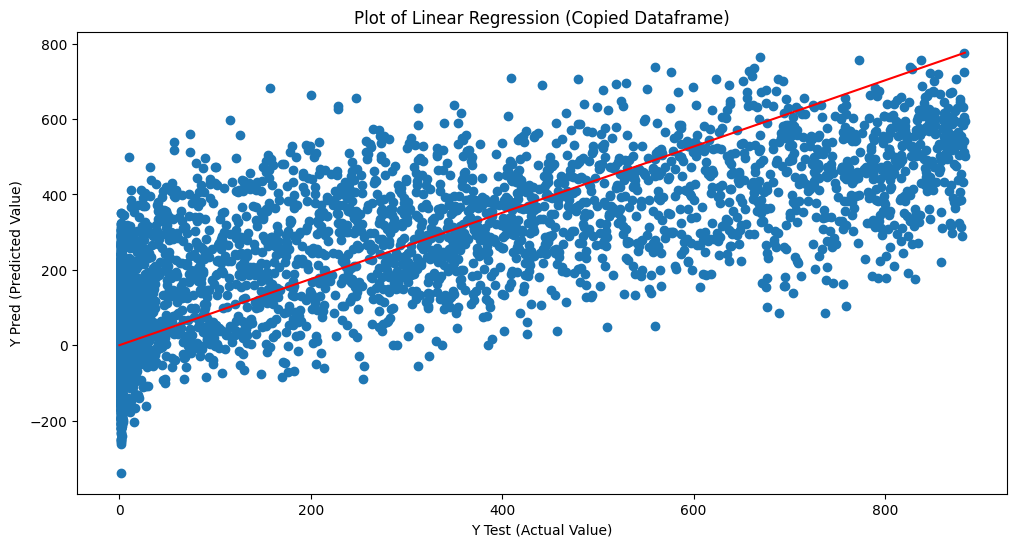

In [54]:
# Linear Regression

# We will use predicted output from best parameter which we get from 'Hyperparameter Tuning'

# Plotting Regression Line
plt.figure(figsize=(12,6))
plt.scatter(y_test,grid_lr_pred)                             # Scatter Plot (x,y)
plt.plot([0,max(y_test)],[0,max(grid_lr_pred)],color='r')    # Regression Line
plt.title('Plot of Linear Regression (Copied Dataframe)')    # Title
plt.xlabel('Y Test (Actual Value)')                          # X Label in plot
plt.ylabel('Y Pred (Predicted Value)')                       # Y Label in plot

Text(0, 0.5, 'Y Pred (Predicted Value)')

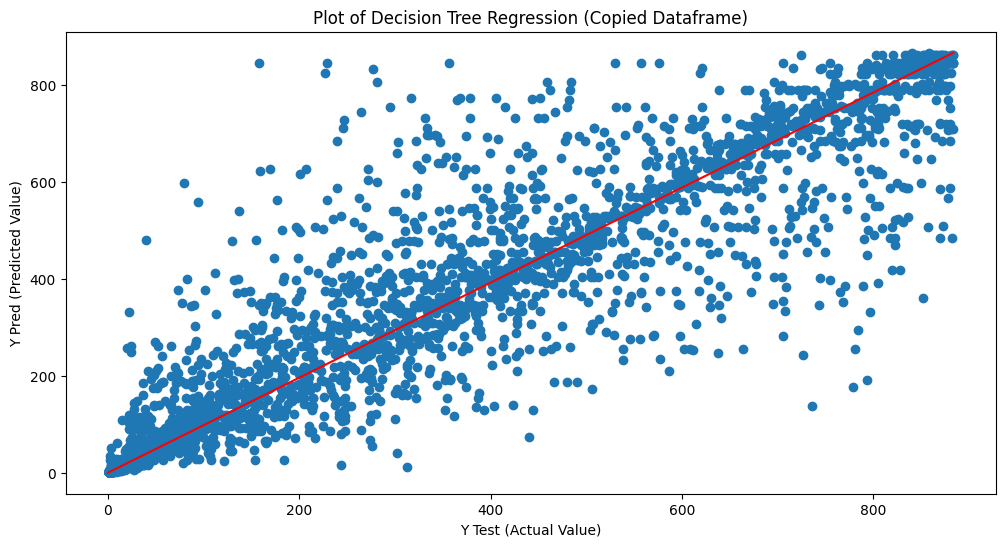

In [55]:
# Decision Tree Regression

# We will use predicted output from best parameter which we get from 'Hyperparameter Tuning'

# Plotting Regression Line
plt.figure(figsize=(12,6))
plt.scatter(y_test,grid_dtree_pred)                                 # Scatter Plot (x,y)
plt.plot([0,max(y_test)],[0,max(grid_dtree_pred)],color='r')        # Regression Line
plt.title('Plot of Decision Tree Regression (Copied Dataframe)')    # Title
plt.xlabel('Y Test (Actual Value)')                                 # X Label in plot
plt.ylabel('Y Pred (Predicted Value)')                              # Y Label in plot

In [ ]:
# Random Forest Regression

# We will use predicted output from best parameter which we get from 'Hyperparameter Tuning'

# Plotting Regression Line
plt.figure(figsize=(12,6))
plt.scatter(y_test,grid_rfr_pred)                                   # Scatter Plot (x,y)
plt.plot([0,max(y_test)],[0,max(grid_rfr_pred)],color='r')          # Regression Line
plt.title('Plot of Random Forest Regression (Copied Dataframe)')    # Title
plt.xlabel('Y Test (Actual Value)')                                 # X Label in plot
plt.ylabel('Y Pred (Predicted Value)')                              # Y Label in plot

In [ ]:
# Support Vector Regression

# We will use predicted output from best parameter which we get from 'Hyperparameter Tuning'

# Plotting Regression Line
plt.figure(figsize=(12,6))
plt.scatter(y_test,grid_svr_pred)                                   # Scatter Plot (x,y)
plt.plot([0,max(y_test)],[0,max(grid_svr_pred)],color='r')          # Regression Line
plt.title('Plot of Support Vector Regression (Copied Dataframe)')   # Title
plt.xlabel('Y Test (Actual Value)')                                 # X Label in plot
plt.ylabel('Y Pred (Predicted Value)')                              # Y Label in plot

Text(0, 0.5, 'Y Pred (Predicted Value)')

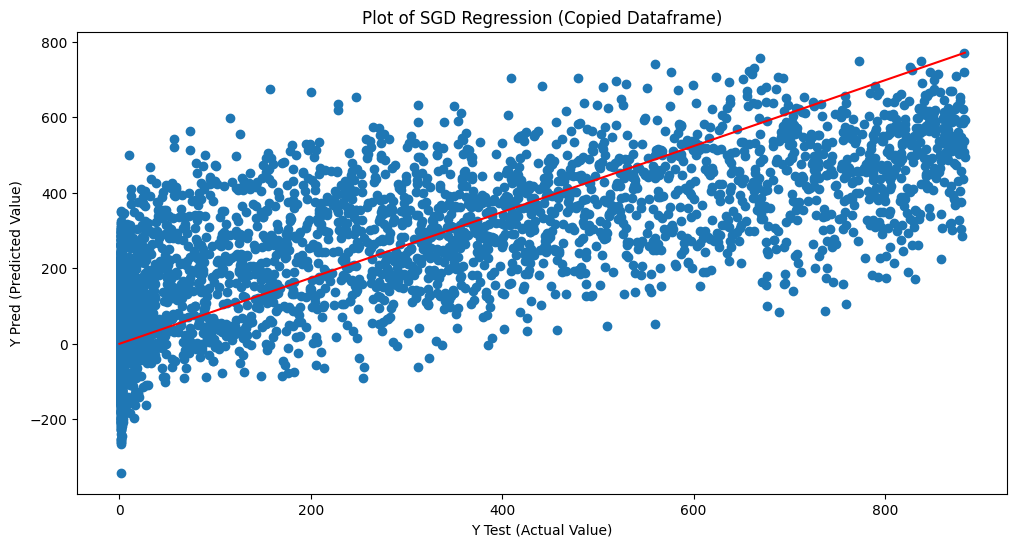

In [63]:
# SGD Regression

# We will use predicted output from best parameter which we get from 'Hyperparameter Tuning'

# Plotting Regression Line
plt.figure(figsize=(12,6))
plt.scatter(y_test,grid_sgd_pred)                                   # Scatter Plot (x,y)
plt.plot([0,max(y_test)],[0,max(grid_sgd_pred)],color='r')          # Regression Line
plt.title('Plot of SGD Regression (Copied Dataframe)')              # Title
plt.xlabel('Y Test (Actual Value)')                                 # X Label in plot
plt.ylabel('Y Pred (Predicted Value)')                              # Y Label in plot

In [ ]:
# Gradient Boosting Regression

# We will use predicted output from best parameter which we get from 'Hyperparameter Tuning'

# Plotting Regression Line
plt.figure(figsize=(12,6))
plt.scatter(y_test,grid_gbr_pred)                                                 # Scatter Plot (x,y)
plt.plot([0,max(y_test)],[0,max(grid_gbr_pred)],color='r')                        # Regression Line
plt.title('Plot of Gradient Boosting Regression (Copied Dataframe)')              # Title
plt.xlabel('Y Test (Actual Value)')                                               # X Label in plot
plt.ylabel('Y Pred (Predicted Value)')                                            # Y Label in plot

Text(0, 0.5, 'Y Pred (Predicted Value)')

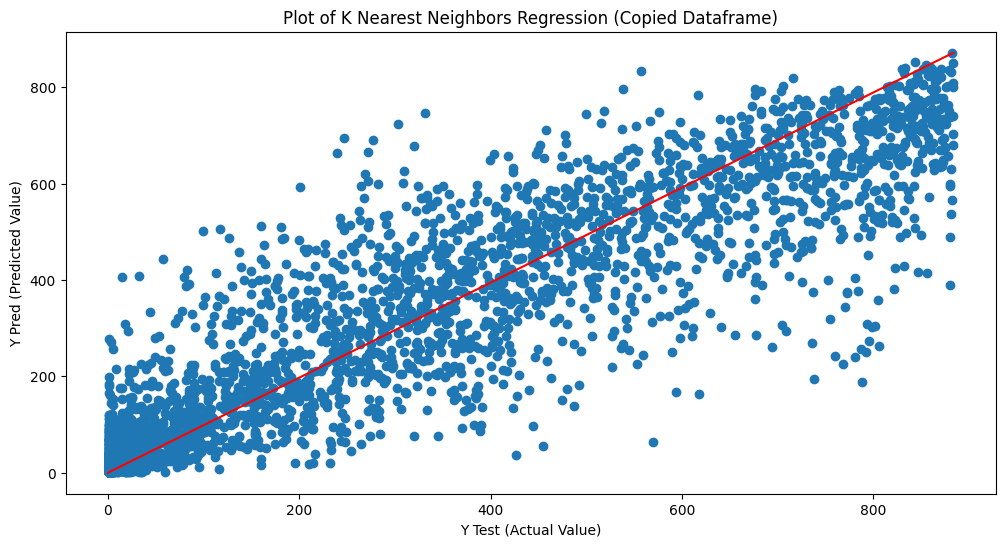

In [56]:
# K Nearest Neighbors Regression

# We will use predicted output from best parameter which we get from 'Hyperparameter Tuning'

# Plotting Regression Line
plt.figure(figsize=(12,6))
plt.scatter(y_test,grid_knn_pred)                                                 # Scatter Plot (x,y)
plt.plot([0,max(y_test)],[0,max(grid_knn_pred)],color='r')                        # Regression Line
plt.title('Plot of K Nearest Neighbors Regression (Copied Dataframe)')            # Title
plt.xlabel('Y Test (Actual Value)')                                               # X Label in plot
plt.ylabel('Y Pred (Predicted Value)')                                            # Y Label in plot

Text(0, 0.5, 'Y Pred (Predicted Value)')

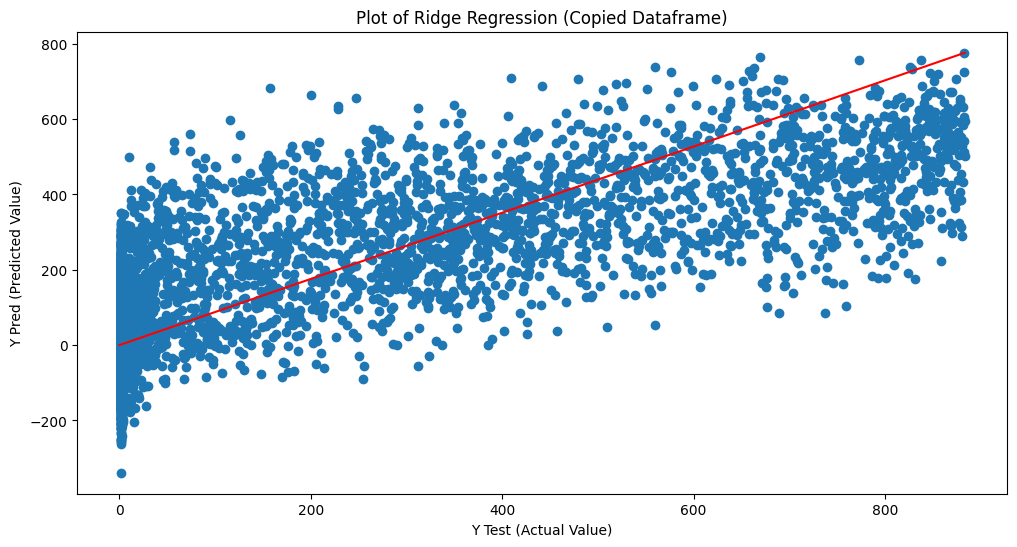

In [57]:
# Ridge Regression

# We will use predicted output from best parameter which we get from 'Hyperparameter Tuning'

# Plotting Regression Line
plt.figure(figsize=(12,6))
plt.scatter(y_test,grid_ridge_pred)                                               # Scatter Plot (x,y)
plt.plot([0,max(y_test)],[0,max(grid_ridge_pred)],color='r')                      # Regression Line
plt.title('Plot of Ridge Regression (Copied Dataframe)')                          # Title
plt.xlabel('Y Test (Actual Value)')                                               # X Label in plot
plt.ylabel('Y Pred (Predicted Value)')                                            # Y Label in plot

Text(0, 0.5, 'Y Pred (Predicted Value)')

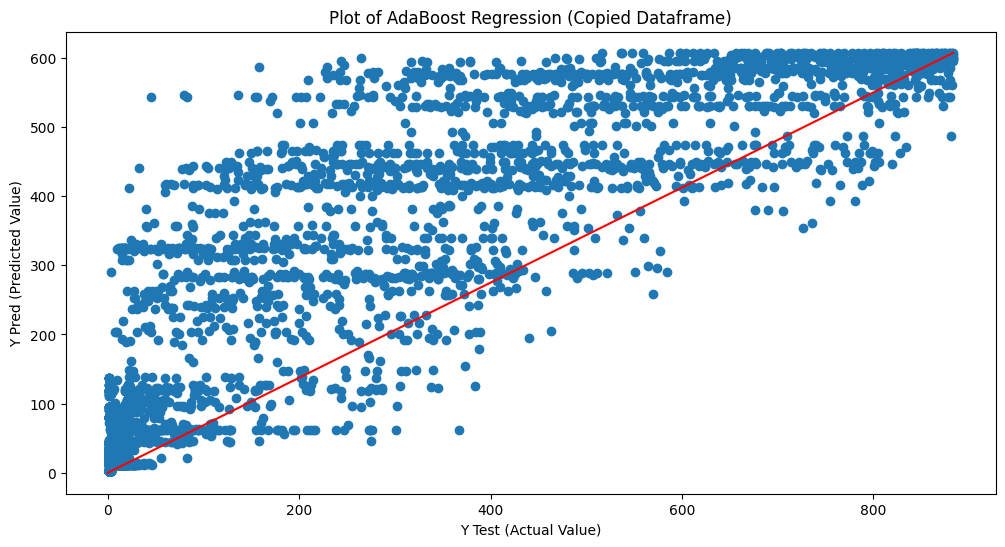

In [58]:
# AdaBoost Regression

# We will use predicted output from best parameter which we get from 'Hyperparameter Tuning'

# Plotting Regression Line
plt.figure(figsize=(12,6))
plt.scatter(y_test,grid_abr_pred)                                                 # Scatter Plot (x,y)
plt.plot([0,max(y_test)],[0,max(grid_abr_pred)],color='r')                        # Regression Line
plt.title('Plot of AdaBoost Regression (Copied Dataframe)')                          # Title
plt.xlabel('Y Test (Actual Value)')                                               # X Label in plot
plt.ylabel('Y Pred (Predicted Value)')                                            # Y Label in plot

Text(0, 0.5, 'Y Pred (Predicted Value)')

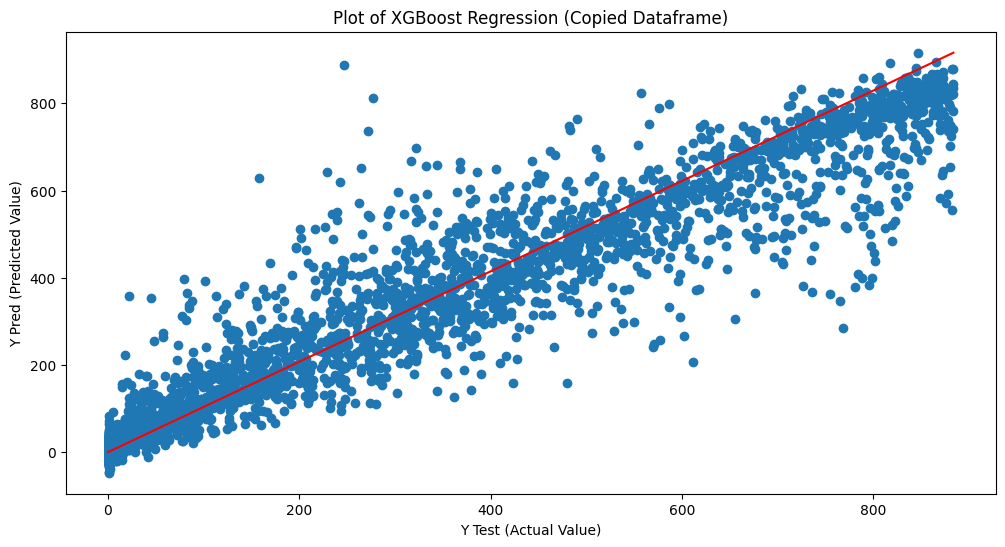

In [66]:
# XGBoost Regression

# We will use predicted output from best parameter which we get from 'Hyperparameter Tuning'

# Plotting Regression Line
plt.figure(figsize=(12,6))
plt.scatter(y_test,grid_xgr_pred)                                                   # Scatter Plot (x,y)
plt.plot([0,max(y_test)],[0,max(grid_xgr_pred)],color='r')                          # Regression Line
plt.title('Plot of XGBoost Regression (Copied Dataframe)')                          # Title
plt.xlabel('Y Test (Actual Value)')                                                 # X Label in plot
plt.ylabel('Y Pred (Predicted Value)')                                              # Y Label in plot

# Final Conclusion

According to our model implementation process in both Phase-I(Without Outlier and Scaled Features) and Phase-II(With Outliers, No Feature Scaling and No Hyperparameter Tuning), we are able to conclude that:
1. All models working and predicting same or approx. same values. So, their is not such a great benefit we getting by removing outliers, performing feature scaling and performing hyperparameter tuning.
2. Our Evaluation Matries (MAE, MSE, RMSE and R2 Score) is not showing so much variation in both model implementation phases, except XGBoost Model.
3. Random Forest Regressor and XG Boost Regressor performing best in both phases. These two models are able to achieve most of the points.
4. Evaluation Matries Camparison between Top 2 Models:


-- > Copied Dataframe (Without Outliers, Scaled Features and With Hyperparameter Tuning)

Random Forest:
*   List item
*   List item
*   List item
*   List item

XGBoost:
*   Mean Absolute Error:28.10
*   Mean Squared Error:3809.20
*   Root Mean Squared Error:61.72
*   R2 Score:0.94






## Hence, It is clear that 'XGBoost Regressor' is Best Model To Solve This Problem.